In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Setting Up

In [2]:
# Install packages
!pip install surprise
!pip install pmdarima

     |████████████████████████████████| 6.5MB 2.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1675373 sha256=37093bd1cc95a1f909fafed5b9c1c8549a04f6a40439b6ae4303e6a16ad7a8ff
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise
     |████████████████████████████████| 1.5MB 2.9MB/s 
     |████████████████████████████████| 2.1MB 16.5MB/s 
     |████████████████████████████████| 8.7MB 29.5MB/s 
  Found existing installation: Cython 0.29.19
    Uninstalling Cython-0.29.19:
      Successfully uninstalled Cython-0.29.19
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [0]:
import pandas as pd

# custom function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


In [0]:
# Import raw data
raw_train = pd.read_csv('/content/drive/My Drive/ML_Project/store152_data.csv')

# Remove negative value in productquantity and purchaseamount as they indicates a return
raw_train = raw_train[(raw_train['purchaseamount'] > 0)]

# Select date from 2012-04-01 to 2013-03-31 for full one year horizon 
start_date = '2012-04-01'
end_date = '2013-03-31'
raw_train = raw_train[(raw_train['date'] >= start_date) & (raw_train['date'] <= end_date) ]

# Change naming of department and category
raw_train['dept'] = "dept_"+ raw_train['dept'].astype(str)
raw_train['category'] = "cat_"+ raw_train['category'].astype(str)

In [0]:
# Price per unit
price_table = raw_train.copy()
price_table = price_table.groupby(['category'], as_index=False)['purchaseamount','purchasequantity'].sum()
price_table['price'] = price_table['purchaseamount']/price_table['purchasequantity']
price_table.to_csv("/content/drive/My Drive/ML_Project/price_table.csv")
price_table

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,category,purchaseamount,purchasequantity,price
0,cat_0,1.329408e+05,38245,3.476031
1,cat_1004,2.280090e+04,16992,1.341861
2,cat_1006,5.125040e+03,1927,2.659595
3,cat_1007,1.147611e+04,10355,1.108268
4,cat_1008,8.163100e+02,453,1.802009
...,...,...,...,...
773,cat_9904,1.180383e+06,244175,4.834169
774,cat_9905,1.989060e+03,484,4.109628
775,cat_9908,8.709431e+05,280822,3.101406
776,cat_9909,7.388373e+05,194571,3.797263


In [0]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10583924 entries, 0 to 12004513
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                int64  
 1   chain             int64  
 2   dept              object 
 3   category          object 
 4   company           int64  
 5   brand             int64  
 6   date              object 
 7   productsize       float64
 8   productmeasure    object 
 9   purchasequantity  int64  
 10  purchaseamount    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 969.0+ MB


In [0]:
raw_train.groupby('chain')['dept'].value_counts()

chain  dept   
152    dept_9     1028668
       dept_63     778529
       dept_99     635717
       dept_26     506451
       dept_36     497058
                   ...   
       dept_47       4216
       dept_78       2989
       dept_82       1613
       dept_98       1145
       dept_91        551
Name: dept, Length: 82, dtype: int64

# Exploratory Data Analysis

In [0]:
#Import library
import matplotlib.pyplot as plt
import numpy as np



In [0]:
eda = raw_train.copy()

       dept  purchaseamount
75  dept_91    6.233430e+03
80  dept_98    1.289288e+04
69  dept_78    1.575683e+04
42  dept_47    1.834371e+04
73  dept_82    1.894755e+04
..      ...             ...
30  dept_36    2.349645e+06
19  dept_26    2.654417e+06
81  dept_99    2.829390e+06
57  dept_63    3.181814e+06
74   dept_9    4.253573e+06

[82 rows x 2 columns]


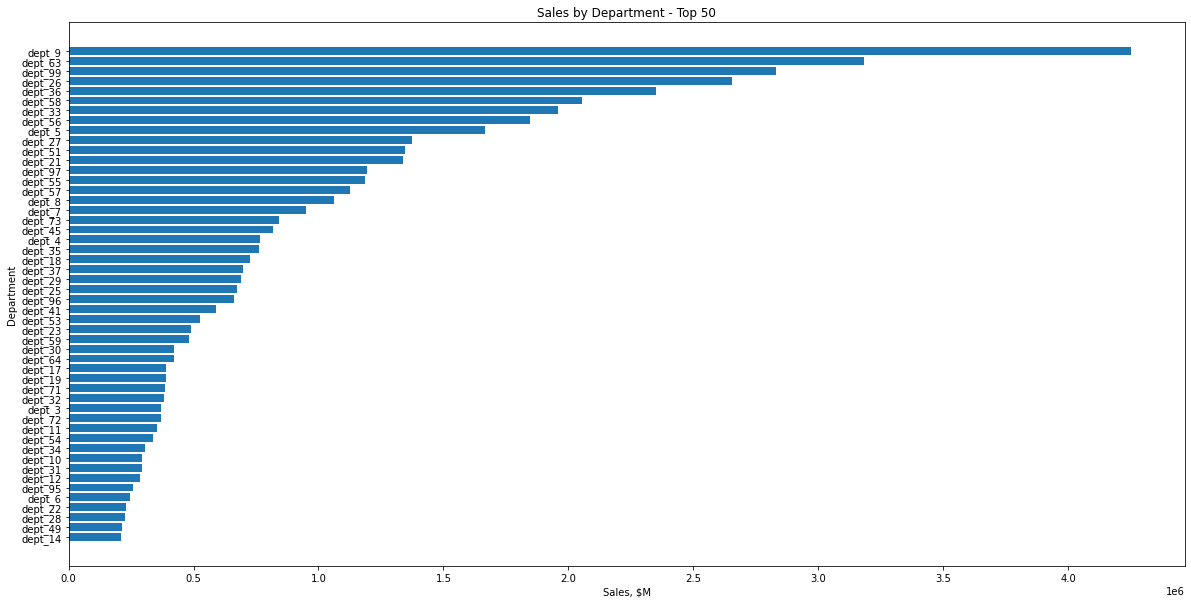

<Figure size 432x288 with 0 Axes>

In [0]:
# Sales by deparment
sales_by_dept = eda.groupby(['dept'], as_index=False)['purchaseamount'].sum().sort_values(by='purchaseamount', ascending=True)
sales_by_dept.to_csv("/content/drive/My Drive/ML_Project/sales_by_dept.csv", index=False)
print(sales_by_dept)

# Create horizontal bars
height = sales_by_dept.purchaseamount[-50:]
bars = sales_by_dept.dept[-50:]
y_pos = np.arange(len(bars))
plt.figure(figsize=(20,10))
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Add title and axis names
plt.title('Sales by Department - Top 50')
plt.xlabel('Sales, $M')
plt.ylabel('Department')

# Show graphic
plt.show()
plt.savefig("Sales by Department.png")


     category  purchaseamount
777   cat_999    1.990000e+00
455  cat_5799    3.870000e+00
765  cat_9787    5.450000e+00
116  cat_2199    6.960000e+00
757  cat_9767    6.990000e+00
..        ...             ...
775  cat_9908    8.709431e+05
379   cat_501    9.096054e+05
773  cat_9904    1.180383e+06
508  cat_6315    1.180620e+06
670   cat_907    1.365521e+06

[778 rows x 2 columns]


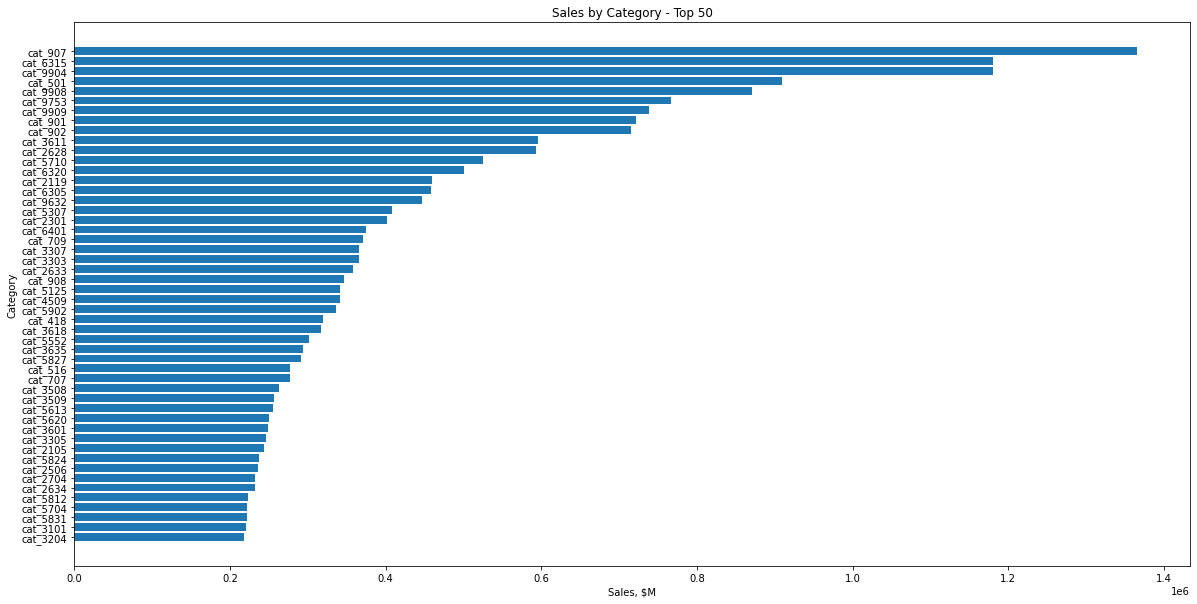

In [0]:
# Sales by category
sales_by_cat = eda.groupby(['category'], as_index=False)['purchaseamount'].sum().sort_values(by='purchaseamount', ascending=True)
sales_by_cat.to_csv("/content/drive/My Drive/ML_Project/sales_by_cat.csv", index=False)
print(sales_by_cat)

# Create horizontal bars of top 50 product sales
height = sales_by_cat.purchaseamount[-50:]
bars = sales_by_cat.category[-50:]
y_pos = np.arange(len(bars))
plt.figure(figsize=(20,10))
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Add title and axis names
plt.title('Sales by Category - Top 50')
plt.xlabel('Sales, $M')
plt.ylabel('Category')

# Show graphic
plt.show()

                            item  purchaseamount
13100      cat_9753_1023209727_0        0.490000
10713   cat_8115_1068826767_7173        0.690000
2213   cat_2633_1068826767_20616        0.750000
7946     cat_6402_107272878_9972        0.750000
4264   cat_3626_1068826767_20616        0.890000
...                          ...             ...
7002   cat_5710_1089470080_21065   293015.150000
4201    cat_3611_107572070_14196   357012.460000
2134     cat_2628_103700030_2248   361401.020000
7607   cat_6315_1068826767_81691   431913.810000
13872   cat_9904_103338333_33170   552695.419999

[13988 rows x 2 columns]


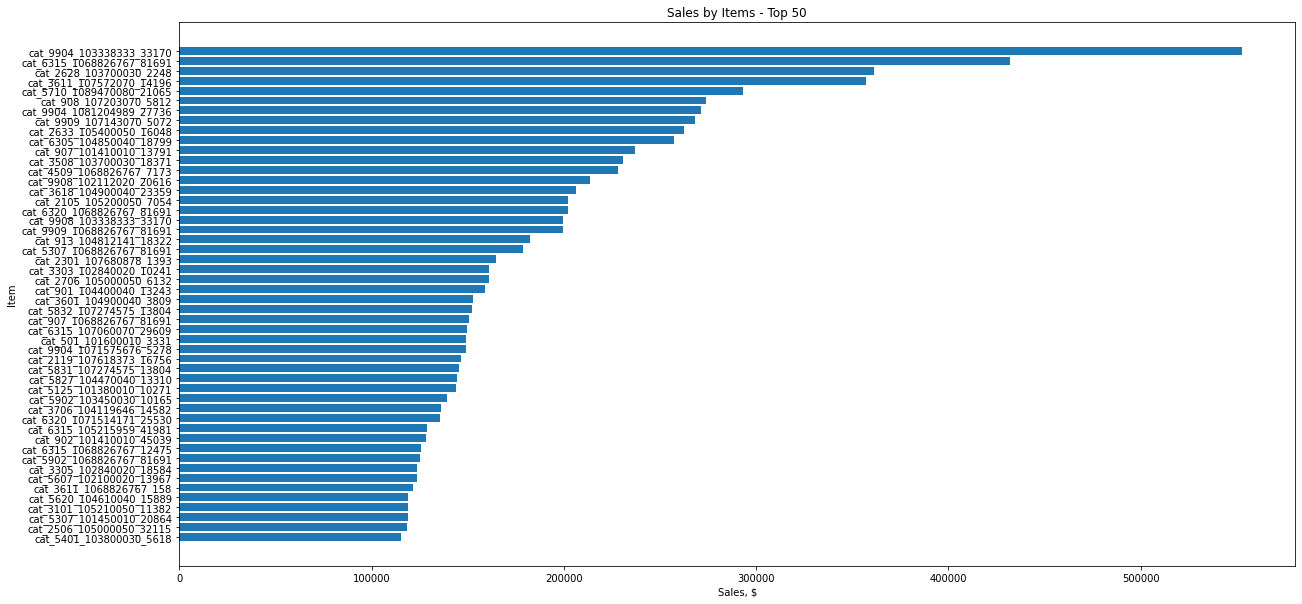

In [0]:
items = eda.copy()
items['item'] = items['category'].astype(str) + "_" + items['company'].astype(str) + "_" + items['brand'].astype(str)

# sales by item
sales_by_items = items.groupby(['item'], as_index=False)['purchaseamount'].sum().sort_values(by='purchaseamount', ascending=True)
sales_by_items
sales_by_items.to_csv("/content/drive/My Drive/ML_Project/sales_by_items.csv", index=False)
print(sales_by_items)

# Create horizontal bars of top 50 product sales
height = sales_by_items.purchaseamount[-50:]
bars = sales_by_items.item[-50:]
y_pos = np.arange(len(bars))
plt.figure(figsize=(20,10))
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Add title and axis names
plt.title('Sales by Items - Top 50')
plt.xlabel('Sales, $')
plt.ylabel('Item')

# Show graphic
plt.show()

    month     id  purchaseamount
0       1  73398      4803131.75
1       2  67606      4440946.47
2       3  75079      4929287.52
3       4  62228      3631183.95
4       5  65439      3846151.33
5       6  64338      3807698.68
6       7  65333      3700578.25
7       8  65086      3707858.96
8       9  68264      4055333.30
9      10  70237      4162272.33
10     11  69115      4359477.22
11     12  74467      5202993.09


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'Customer by Month')

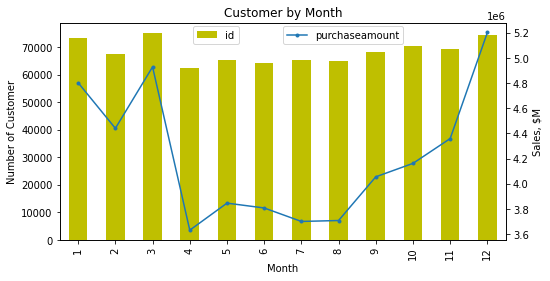

In [0]:
# Create customer per day report
cusm = eda.groupby(by='date', as_index=False).agg({'id': pd.Series.nunique,'purchaseamount':pd.Series.sum})

# Aggregate as month table
cusm['date'] = pd.to_datetime(cusm['date'])
cusm = cusm.sort_values(by=['date'], ascending=True)
cusm['month'] = cusm['date'].apply(lambda x: x.month)
cusm = cusm.groupby(['month'], as_index=False)['id','purchaseamount'].sum()
print(cusm)

# Plot combo chart
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()
cusm['id'].plot(kind='bar', color='y', ax=ax1)
cusm['purchaseamount'].plot(kind='line', marker='.', ax=ax2)
bars = cusm.month
y_pos = np.arange(len(bars))

# Create names on the y-axis
plt.xticks(y_pos, bars)

# Add title and axis names
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Customer')
ax2.set_ylabel('Sales, $M')
ax2.legend(loc=(0.5,0.9))
ax1.legend(loc=(0.3,0.9))
plt.title('Customer by Month')


    month     id  purchaseamount  sales per customer
0       1  73398      4803131.75           65.439545
1       2  67606      4440946.47           65.688644
2       3  75079      4929287.52           65.654677
3       4  62228      3631183.95           58.352895
4       5  65439      3846151.33           58.774604
5       6  64338      3807698.68           59.182733
6       7  65333      3700578.25           56.641793
7       8  65086      3707858.96           56.968610
8       9  68264      4055333.30           59.406617
9      10  70237      4162272.33           59.260395
10     11  69115      4359477.22           63.075703
11     12  74467      5202993.09           69.869782


Text(0.5, 1.0, 'Customer by Month')

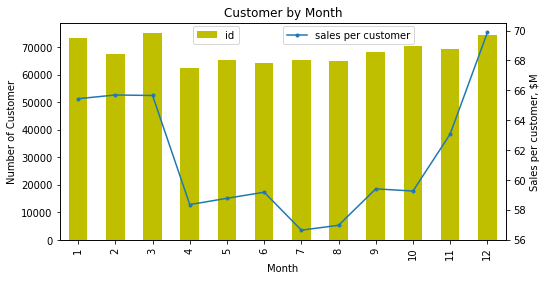

In [0]:
# spending power
spend = cusm.copy()
spend['sales per customer'] = spend['purchaseamount'] / spend['id']
spend.to_csv("/content/drive/My Drive/ML_Project/customer_by_month.csv", index=False)
print(spend)

# Plot combo chart
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()
spend['id'].plot(kind='bar', color='y', ax=ax1)
spend['sales per customer'].plot(kind='line', marker='.', ax=ax2)
bars = spend.month
y_pos = np.arange(len(bars))

# Create names on the y-axis
plt.xticks(y_pos, bars)

# Add title and axis names
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Customer')
ax2.set_ylabel('Sales per customer, $M')
ax2.legend(loc=(0.5,0.9))
ax1.legend(loc=(0.3,0.9))
plt.title('Customer by Month')

   weekday      id  purchaseamount
0        1  115983      6695693.39
1        2  104584      5543691.14
2        3  107524      5573990.52
3        4  107823      5648642.24
4        5  116102      7274690.62
5        6  128229      9400252.44
6        7  140345     10509952.50


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'Customer by Weekday')

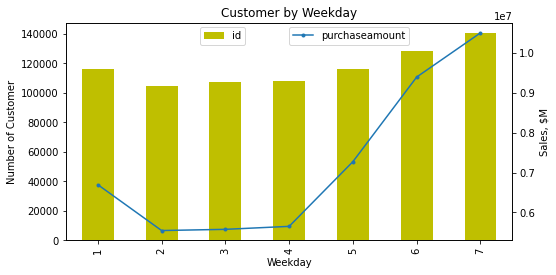

In [0]:
# Create customer per day report
cus = eda.groupby(by='date', as_index=False).agg({'id': pd.Series.nunique,'purchaseamount':pd.Series.sum})

# Aggregate as weekday table
cus['date'] = pd.to_datetime(cus['date'])
cus = cus.sort_values(by=['date'], ascending=True)
cus['weekday'] = cus['date'].apply(lambda x: x.weekday()+1)
cus = cus.groupby(['weekday'], as_index=False)['id','purchaseamount'].sum()
cus.to_csv("/content/drive/My Drive/ML_Project/customer_by_weekday.csv", index=False)
print(cus)

# Plot combo chart
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()
cus['id'].plot(kind='bar', color='y', ax=ax1)
cus['purchaseamount'].plot(kind='line', marker='.', ax=ax2)

bars = cus.weekday
y_pos = np.arange(len(bars))

# Create names on the y-axis
plt.xticks(y_pos, bars)

# Add title and axis names
ax1.set_xlabel('Weekday')
ax1.set_ylabel('Number of Customer')
ax2.set_ylabel('Sales, $M')
ax2.legend(loc=(0.5,0.9))
ax1.legend(loc=(0.3,0.9))
plt.title('Customer by Weekday')


# Market Basket Analysis

**Data transformation of MBA**




In [0]:
# Import package
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [0]:
raw=raw_train.copy()
# Select column needed
raw = raw[['id','date','dept','category','purchasequantity']]
# Create unique transaction id by assuming that one id doing all purchasing in one same date
raw['trx_id'] = raw['id'].astype(str)+"_"+raw['date']
# Create unique product id by concatenating dept and category
raw['product'] = raw['category']
raw = raw.groupby(['trx_id','product'], as_index=False)['purchasequantity'].sum()
raw

,trx_id,product,purchasequantity
0,4427711419_2012-12-11,cat_0,35
1,4427711419_2012-12-11,cat_1004,2
2,4427711419_2012-12-11,cat_1010,5
3,4427711419_2012-12-11,cat_1011,10
4,4427711419_2012-12-11,cat_1013,3
...,...,...,...
9250922,4804028732_2013-03-29,cat_3635,2
9250923,4804028732_2013-03-29,cat_5305,2
9250924,4804028732_2013-03-29,cat_5613,1
9250925,4804028732_2013-03-29,cat_6315,1


In [0]:
# Count transaction count of each category
trx_count = raw.copy()
trx_count['trx_count'] = 1
trx_count = trx_count.groupby(['product'], as_index=False)['trx_count'].sum()
trx_count.to_csv("/content/drive/My Drive/ML_Project/trx_count.csv")
trx_count

,product,trx_count
0,cat_0,28027
1,cat_1004,7981
2,cat_1006,1615
3,cat_1007,4226
4,cat_1008,345
...,...,...
773,cat_9904,153965
774,cat_9905,242
775,cat_9908,174093
776,cat_9909,140308


In [0]:
# Transform to MBA ready format
pivot = raw.pivot_table(index=['trx_id'], columns=['product'], values = 'purchasequantity',aggfunc='sum').fillna(0).reset_index()
# Set trx_id as index
pivot = pivot.set_index('trx_id')
# Convert any positive value to 1.0
pivot = pivot.applymap(encode_units)

In [0]:
# Export frequent item sets
pivot.to_csv("/content/drive/My Drive/ML_Project/mba_pivot.csv")

In [0]:
# Export frequent item sets
pivot.head(30)

product,cat_0,cat_1004,cat_1006,cat_1007,cat_1008,cat_1009,cat_1010,cat_1011,cat_1012,cat_1013,cat_103,cat_104,cat_105,cat_106,cat_1102,cat_1110,cat_1111,cat_1112,cat_1113,cat_1114,cat_1202,cat_1203,cat_1204,cat_1205,cat_1206,cat_1207,cat_1302,cat_1305,cat_1306,cat_1399,cat_1404,cat_1405,cat_1410,cat_1411,cat_1414,cat_1415,cat_1416,cat_1417,cat_1499,cat_1504,...,cat_9732,cat_9733,cat_9734,cat_9735,cat_9736,cat_9740,cat_9741,cat_9742,cat_9743,cat_9744,cat_9745,cat_9746,cat_9747,cat_9748,cat_9753,cat_9760,cat_9761,cat_9762,cat_9763,cat_9767,cat_9768,cat_9769,cat_9770,cat_9771,cat_9781,cat_9782,cat_9786,cat_9787,cat_9799,cat_9801,cat_9802,cat_9803,cat_9899,cat_9901,cat_9902,cat_9904,cat_9905,cat_9908,cat_9909,cat_999
trx_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4427711419_2012-12-11,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0
4427711419_2012-12-12,1,1,0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0
4427711419_2012-12-13,1,1,0,0,0,0,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0
4427711419_2012-12-14,1,1,1,1,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,1,1,0
4427711419_2012-12-15,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0
4427711419_2012-12-16,1,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0
4427711419_2012-12-17,1,1,1,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
4427711419_2012-12-18,1,0,0,1,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0
4427711419_2012-12-19,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,1,0


**Apply Market Busket Analysis**

In [0]:
# Generate frequent item sets
frequent_itemsets = apriori(pivot, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.087733,(cat_2119)
1,0.133484,(cat_2301)
2,0.058663,(cat_2506)
3,0.065348,(cat_2509)
4,0.053065,(cat_2609)
...,...,...
73,0.057979,"(cat_9904, cat_9909)"
74,0.071385,"(cat_9908, cat_9909)"
75,0.052942,"(cat_501, cat_6315, cat_907)"
76,0.054590,"(cat_6315, cat_6320, cat_907)"


In [0]:
# Generate rules with their corresponding support, confidence and lift:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cat_6315),(cat_2301),0.317483,0.133484,0.062835,0.197917,1.482699,0.020456,1.080332
1,(cat_2301),(cat_6315),0.133484,0.317483,0.062835,0.470731,1.482699,0.020456,1.289548
2,(cat_907),(cat_2301),0.323861,0.133484,0.067885,0.209613,1.570314,0.024655,1.096317
3,(cat_2301),(cat_907),0.133484,0.323861,0.067885,0.508563,1.570314,0.024655,1.375842
4,(cat_3611),(cat_907),0.112780,0.323861,0.051757,0.458918,1.417021,0.015232,1.249605
...,...,...,...,...,...,...,...,...,...
83,"(cat_9908, cat_907)",(cat_6315),0.099341,0.317483,0.055475,0.558429,1.758928,0.023936,1.545657
84,"(cat_6315, cat_907)",(cat_9908),0.151022,0.212140,0.055475,0.367329,1.731541,0.023437,1.245292
85,(cat_9908),"(cat_6315, cat_907)",0.212140,0.151022,0.055475,0.261500,1.731541,0.023437,1.149599
86,(cat_6315),"(cat_9908, cat_907)",0.317483,0.099341,0.055475,0.174733,1.758928,0.023936,1.091355


In [0]:
# Export frequent item sets
frequent_itemsets.to_csv("/content/drive/My Drive/ML_Project/frequent_itemsets.csv")
# Export rules
rules.to_csv("/content/drive/My Drive/ML_Project/rules_sets.csv")

# Recommendation System


**Data Transformation of Collaborative Filterling**

In [0]:
raw_cf = raw_train.copy()
raw_cf = raw_cf.groupby(['id','category'], as_index=False)['purchaseamount'].sum()
raw_cf

,id,category,purchaseamount
0,4427711419,cat_0,2964.61
1,4427711419,cat_1004,349.82
2,4427711419,cat_1006,99.06
3,4427711419,cat_1007,209.53
4,4427711419,cat_1008,26.24
...,...,...,...
2239071,4804028732,cat_6315,11.97
2239072,4804028732,cat_6318,1.99
2239073,4804028732,cat_818,4.49
2239074,4804028732,cat_9753,14.97


In [0]:
df = raw_cf[(raw_cf['category'] == 0)]['purchaseamount']
df.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: purchaseamount, dtype: float64

In [0]:
# Custom function to get quartile value of purchase quantity
def get_quartile(list_of_selection,dataframe,by_column,column_interested):
  compile_dict={}
  for i in list_of_selection:
    statistic = dataframe[(dataframe[by_column] == i)][column_interested].describe()
    Q1 =  statistic['25%']
    Q2 =  statistic['50%']
    Q3 =  statistic['75%']
    Q4 =  statistic['max']
    compile_dict.update({i : [Q4,Q3,Q2,Q1]} )
  return compile_dict

# Create implicit rating dictionary of each product
category_list = raw_cf['category'].unique().tolist()
rating = get_quartile(category_list,raw_cf,'category','purchaseamount')

# Create user with rating table
user_list = raw_cf['id'].tolist()
product_list = raw_cf['category'].tolist()
qty_list = raw_cf['purchaseamount'].tolist()
implicit_rating_list =[]

for i in range(len(product_list)):
  qty = qty_list[i]
  rating_list=rating[product_list[i]]
  implicit_rating = None
  for p in range(len(rating_list)):
    if qty <= rating_list[p]:
      implicit_rating = 4-p
  implicit_rating_list.append(implicit_rating)

raw_cf = pd.DataFrame({'id': user_list, 'category': product_list, 'purchaseamount': qty_list, 'rating':implicit_rating_list})
raw_cf

# Export rating dataset to csv
raw_cf.to_csv("/content/drive/My Drive/ML_Project/recommendation_rating.csv")

**Apply Collaborative Filtering**


In [0]:
# Import surprise library

from surprise import SVD
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader
from collections import defaultdict

In [0]:
# Automatic cross-validation to find out recommendation performance
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 4))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(raw_cf[['id', 'category', 'rating']], reader)

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['MAE'], cv=5, verbose=True)

Evaluating MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.9414  0.9403  0.9395  0.9394  0.9411  0.9403  0.0008  
Fit time          109.40  109.18  112.57  111.17  110.23  110.51  1.25    
Test time         7.20    6.14    6.40    7.26    6.08    6.61    0.51    


{'fit_time': (109.39512491226196,
  109.18478775024414,
  112.57358074188232,
  111.16635632514954,
  110.22657370567322),
 'test_mae': array([0.94135895, 0.94026103, 0.93951716, 0.93941282, 0.94106155]),
 'test_time': (7.197138786315918,
  6.14398717880249,
  6.3960254192352295,
  7.2568442821502686,
  6.077886343002319)}

In [0]:
# Custom function of top-N recommendations for each user
def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 4))

# First train an SVD algorithm on the dataset.
data = Dataset.load_from_df(raw_cf[['id', 'category', 'rating']], reader)
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)


In [0]:
# Create dictionary of top 10 recommendation items for each user
top_n = get_top_n(predictions, n=10)

# Convert top 10 recommendation dictionary to dataframe
top_ten_recommendation = pd.DataFrame.from_dict(top_n, orient='index')
top_ten_recommendation = top_ten_recommendation.stack().to_frame().reset_index().drop('level_1', axis=1)
top_ten_recommendation.columns = ['id', 'variable']
new_col_list = ['catergory','rating']
for n,col in enumerate(new_col_list):
    top_ten_recommendation[col] = top_ten_recommendation['variable'].apply(lambda variable: variable[n])

top_ten_recommendation = top_ten_recommendation.drop('variable',axis=1)

# Export top 10 recommendation to csv
top_ten_recommendation.to_csv("/content/drive/My Drive/ML_Project/top_10_recommendation.csv")

In [0]:
# Create dataframe of all predictoion
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
all_recommendation = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
all_recommendation['Iu'] = all_recommendation.uid.apply(get_Iu)
all_recommendation['Ui'] = all_recommendation.iid.apply(get_Ui)
all_recommendation['err'] = abs(all_recommendation.est - all_recommendation.rui)

# Select those predicted rating higher than 3.0 only 
all_recommendation = all_recommendation[(all_recommendation['est'] >= 3)].drop('details',axis=1)
# Export all recommendation to csv
all_recommendation.to_csv("/content/drive/My Drive/ML_Project/all_recommendation.csv")

In [0]:
all_recommendation

,uid,iid,rui,est,Iu,Ui,err
0,4427711419,cat_7005,2.469792,3.847017,718,1030,1.377225
1,4427711419,cat_799,2.469792,3.777560,718,97,1.307769
3,4427711419,cat_3103,2.469792,3.296446,718,134,0.826654
4,4427711419,cat_9899,2.469792,3.749837,718,4,1.280046
5,4427711419,cat_7109,2.469792,4.000000,718,35,1.530208
...,...,...,...,...,...,...,...
7581122,4642495814,cat_9731,2.469792,3.063251,142,884,0.593460
7581156,4642495814,cat_9122,2.469792,3.183290,142,278,0.713499
7581507,4797277036,cat_5563,2.469792,3.205186,168,711,0.735394
7581533,4797277036,cat_5823,2.469792,3.083852,168,6526,0.614061


# Forecasting Number of Customer using ARIMA

**Data Preparation for ARIMA**

In [0]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from operator import sub
from pmdarima.arima.utils import ndiffs
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [6]:
# Create customer per day report
arm = raw_train.copy()
arm = arm.groupby(by='date', as_index=False).agg({'id': pd.Series.nunique})


# Prepare ARIMA standard table
arm['date'] = pd.to_datetime(arm['date'])
arm = arm.sort_values(by=['date'], ascending=True)

# Find min date and max date
print("min date:{}, max date:{}".format(arm['date'].min(), arm['date'].max()))

# Create a datelist from 2012-04-01 to 2013-03-31
datelist = pd.date_range(start=start_date,end=end_date).to_frame(index=False,name='date')
arm = pd.merge(datelist, arm, on=['date'], how='left').fillna({'id': 0})
arm.to_csv("/content/drive/My Drive/ML_Project/customer_by_date.csv")
arm

min date:2012-04-01 00:00:00, max date:2013-03-31 00:00:00


,date,id
0,2012-04-01,2439.0
1,2012-04-02,2098.0
2,2012-04-03,1895.0
3,2012-04-04,1916.0
4,2012-04-05,2109.0
...,...,...
360,2013-03-27,2094.0
361,2013-03-28,2184.0
362,2013-03-29,2705.0
363,2013-03-30,3262.0


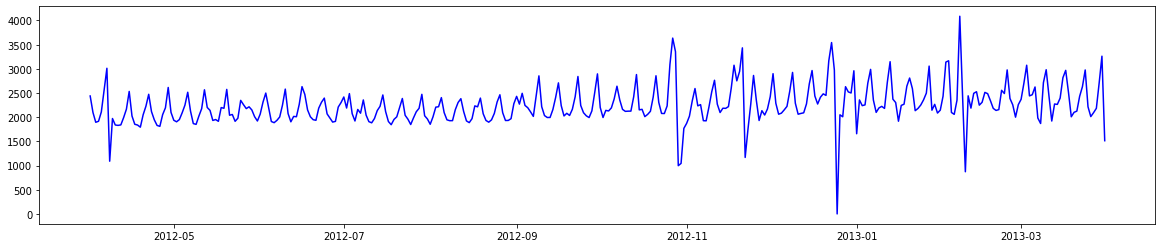

In [0]:
# Line plot of complete data
plt.figure(figsize=(20,4))
plt.plot(arm['date'], arm['id'], 'b') 

In [0]:
# Split data into train and test set
train = arm.loc[arm['date'] < '2013-02-01']
test = arm.loc[arm['date'] >= '2013-02-01']

**ARIMA**

In [0]:
# check if the series is stationary using the Augmented Dickey Fuller test
# Because, we need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.
# The null hypothesis of the ADF test is that the time series is non-stationary. 
# So, if the p-value of the test is less than the significance level (0.05) 
# then we reject the null hypothesis and infer that the time series is indeed stationary.
# So, in our case, if P Value < 0.05 we don't meed to find the order of differencing.

result = adfuller(train.id.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


# Double confirm whether we need to do the differencing
## Adf Test
print (ndiffs(train.id, test='adf'))

# KPSS test
print (ndiffs(train.id, test='kpss'))

# PP test:
print (ndiffs(train.id, test='pp'))

ADF Statistic: -2.360052
p-value: 0.153330
0
1
0


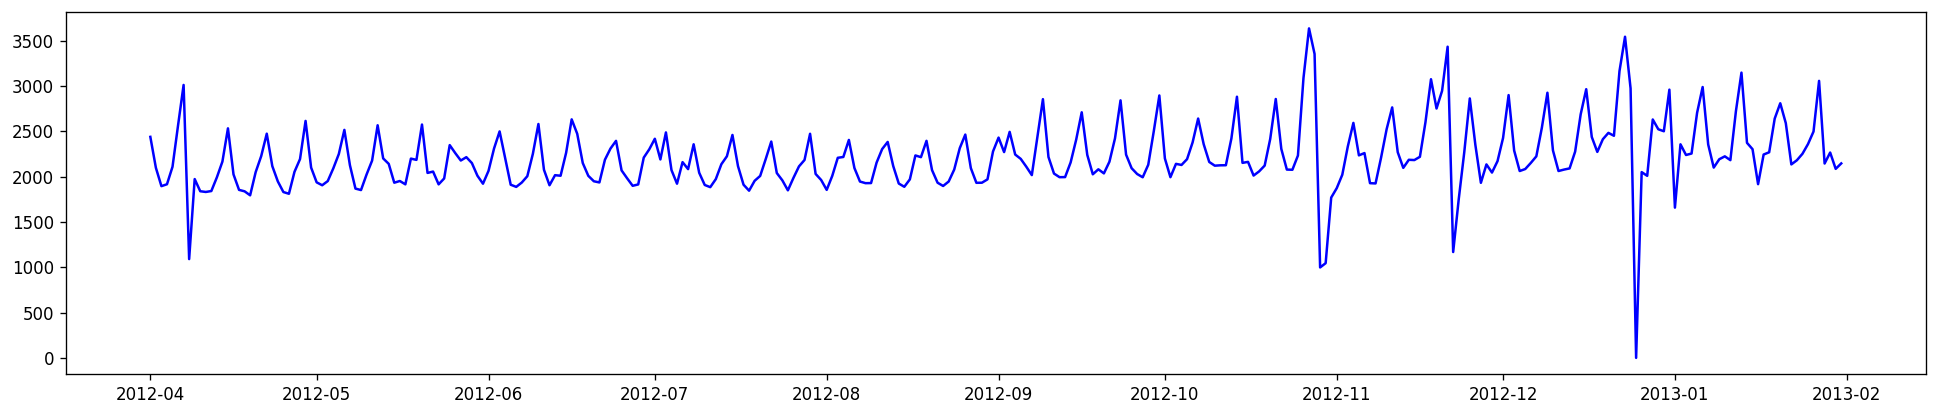

In [0]:
# Line plot of original train data 
plt.figure(figsize=(20,4))
plt.plot(train['date'], train['id'], 'b') 

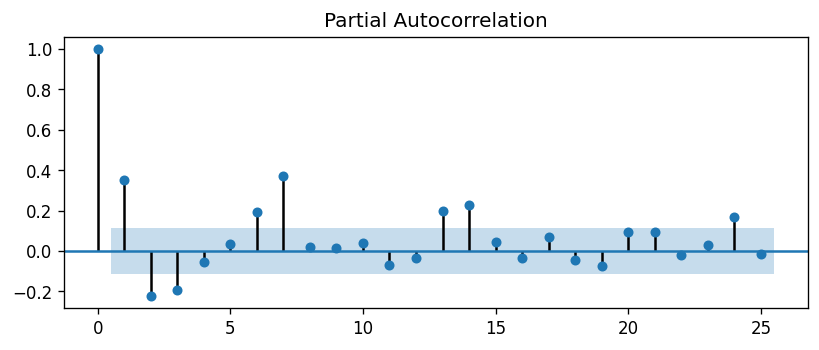

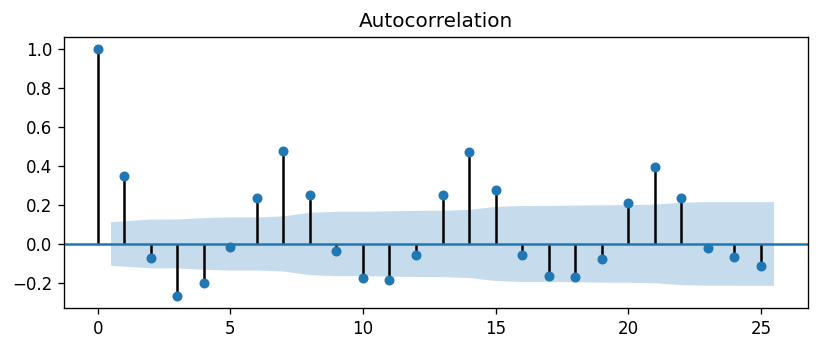

In [0]:
# Find the order of the AR term (p)
plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':120})
plot_pacf(train.id)

# Find the order of the MA term (q)
plot_acf(train.id)
plt.show()

In [0]:
# Difference data with order = 1
train_differenced=train.copy().set_index('date').diff(periods=1).dropna()
train_differenced

,id
date,
2012-04-02,-341.0
2012-04-03,-203.0
2012-04-04,21.0
2012-04-05,193.0
2012-04-06,457.0
...,...
2013-01-27,559.0
2013-01-28,-912.0
2013-01-29,121.0


In [0]:
# Check for adf again after differencing
result = adfuller(train_differenced.id.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.338202
p-value: 0.000000


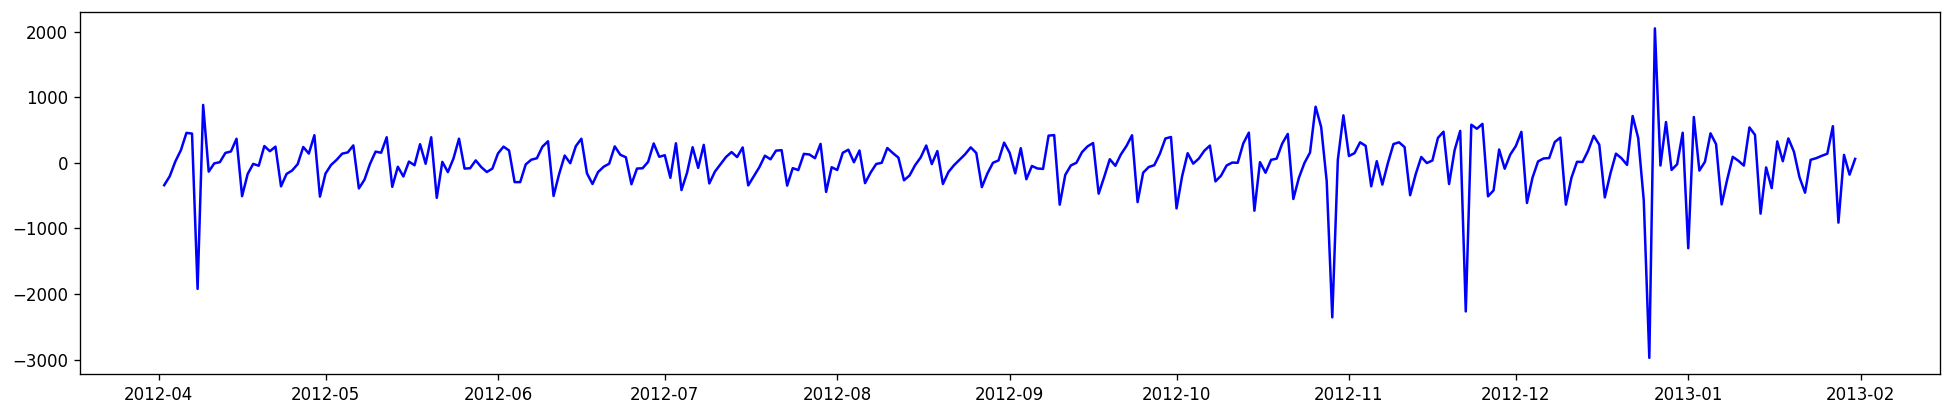

In [0]:
# Line plot of diffference data order = 1
plt.figure(figsize=(20,4))
plt.plot(train_differenced.index, train_differenced['id'], 'b') 

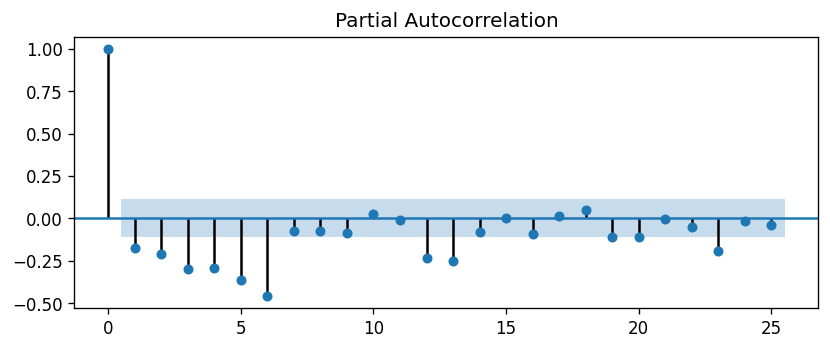

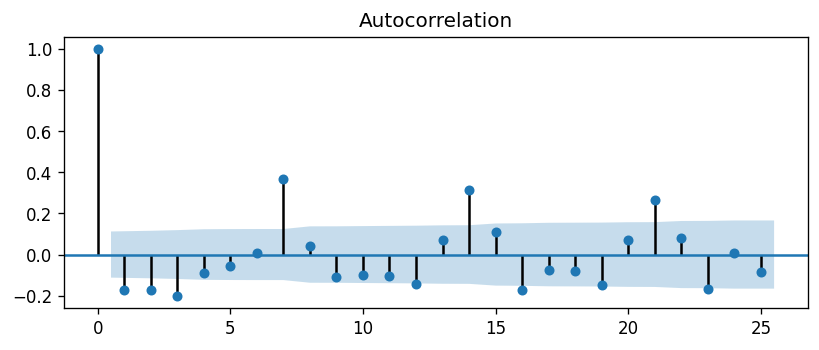

In [0]:
# Find the order of the AR term (p)
plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':120})
plot_pacf(train_differenced)

# Find the order of the MA term (q)
plot_acf(train_differenced)
plt.show()

In [0]:
# Grid Search ARIMA Hyperparameters Class
class grid_search_arima(object):
    def __init__(self, train_list, test_list, p_list, d_list, q_list):
        self.train_list = train_list
        self.test_list = test_list
        self.p_list = p_list
        self.d_list = d_list
        self.q_list = q_list
        self.step = len(self.test_list)
        self.model_dict = {}
        
    def run(self):
        for p in self.p_list:
            for d in self.d_list:
                for q in self.q_list:
                    try:
                        model = ARIMA(self.train_list, order=(p, d, q))
                        model_fit = model.fit(disp=0)
                        forecast = model_fit.forecast(steps=self.step)[0]
                        model_name = "{},{},{}".format(p,d,q)
                        self.model_dict[model_name] = {'aic':model_fit.aic,
                                                      'bic':model_fit.bic,
                                                      'res':model_fit.resid.tolist(),
                                                      'prediction':forecast,
                                                      'mae':mean_absolute_error(self.test_list, forecast)}
                        print ("({},{},{}) success".format(p,d,q))
                        # print(model_fit.summary())

                    except:
                        print ("({},{},{}) failed".format(p,d,q))

                    
                    
                    

In [0]:
# Instantiate a grid_search_arima object
gsa = grid_search_arima(train_list = train['id'].tolist(),
                        test_list = test['id'].tolist(),
                        p_list = [1,2,3],
                        d_list = [0,1],
                        q_list = [1,2,3])
# Run result
gsa.run()

(1,0,1) success
(1,0,2) success
(1,0,3) success
(1,1,1) failed
(1,1,2) failed
(1,1,3) failed
(2,0,1) success
(2,0,2) success
(2,0,3) success
(2,1,1) success
(2,1,2) success
(2,1,3) failed
(3,0,1) success
(3,0,2) failed
(3,0,3) failed
(3,1,1) success
(3,1,2) success
(3,1,3) success


In [0]:
# Compare arima model performance
print("{}\t{}\t{}\t{}".format('p,d,q','aic','bic','mae'))
print("-----------------------------------")
for k in gsa.model_dict.keys():
    print ("{}\t{:.0f}\t{:.0f}\t{:.2f}".format(k,gsa.model_dict[k]['aic'],
                                                       gsa.model_dict[k]['bic'],
                                                       gsa.model_dict[k]['mae']))

p,d,q	aic	bic	mae
-----------------------------------
1,0,1	4449	4464	350.96
1,0,2	4451	4470	350.76
1,0,3	4440	4463	351.94
2,0,1	4436	4454	350.74
2,0,2	4391	4414	324.97
2,0,3	4377	4403	315.49
2,1,1	4413	4431	318.83
2,1,2	4385	4408	316.05
3,0,1	4433	4456	350.60
3,1,1	4389	4412	314.94
3,1,2	4381	4407	316.39
3,1,3	4358	4388	264.28


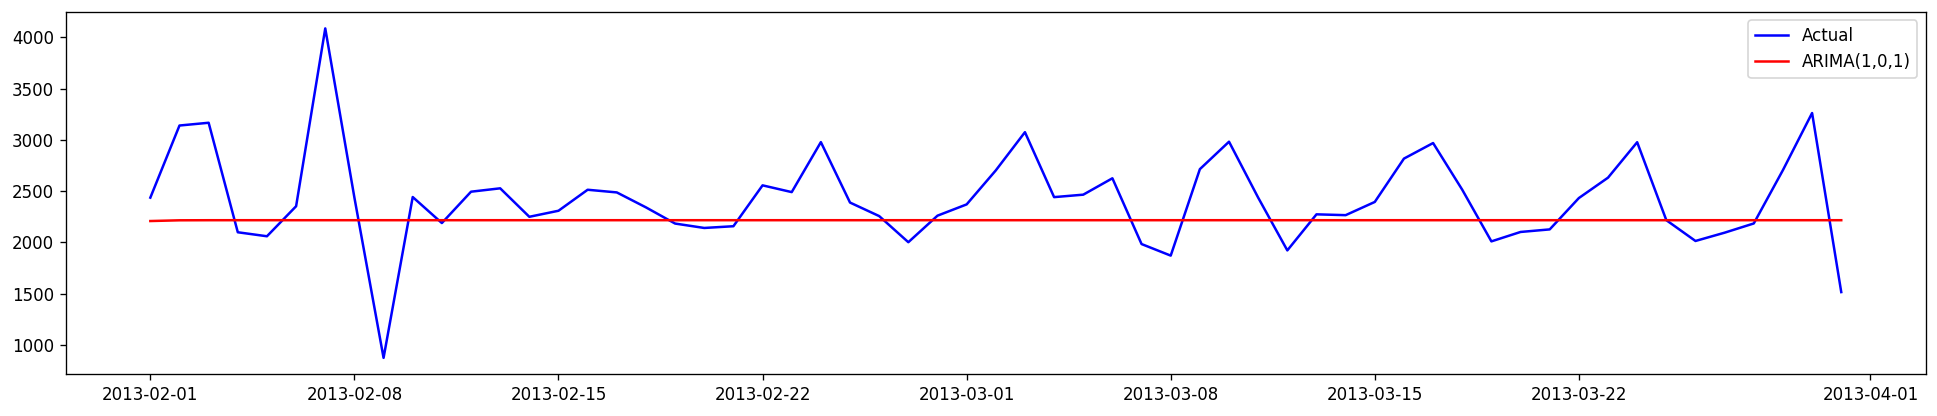

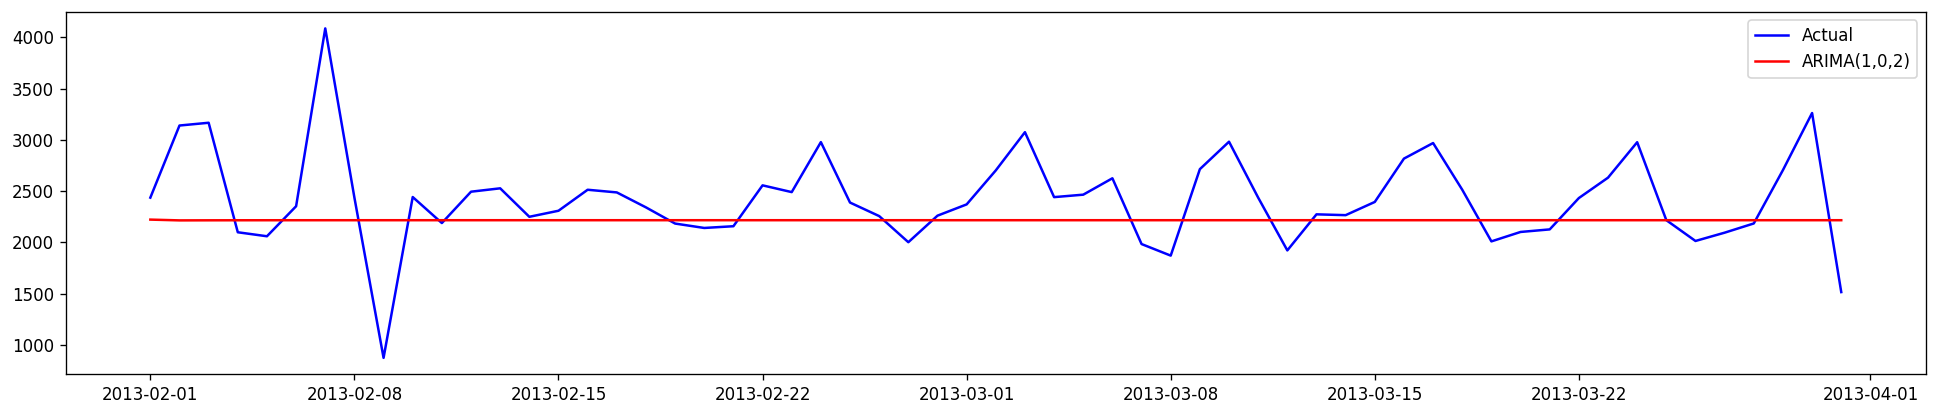

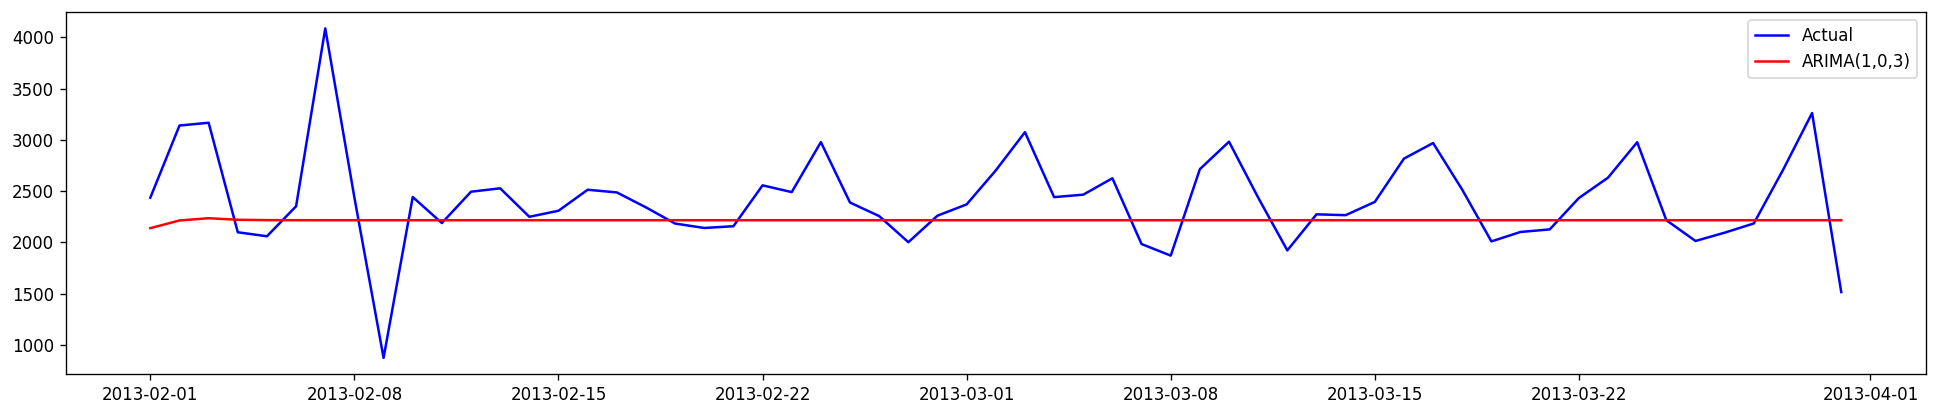

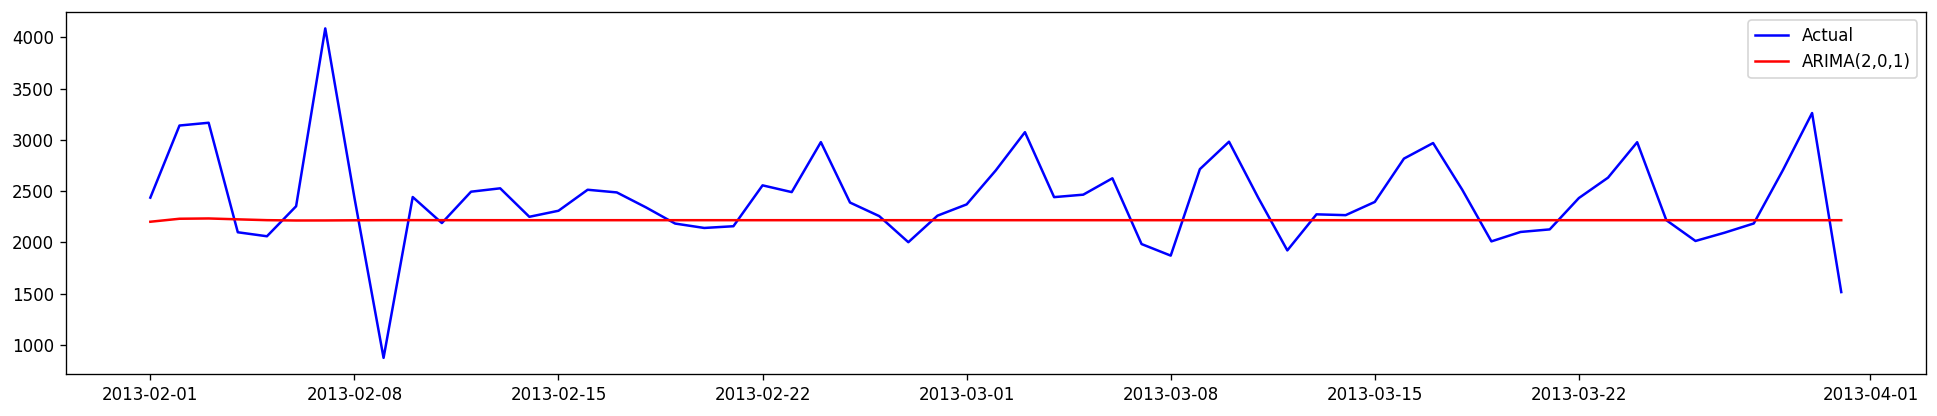

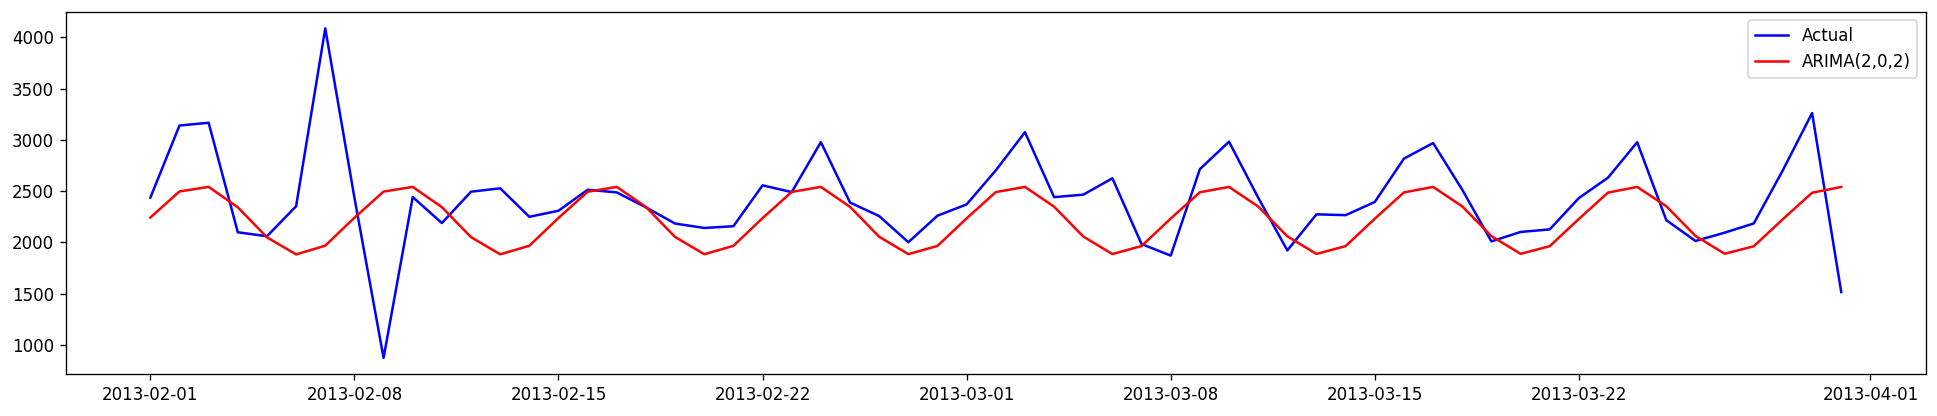

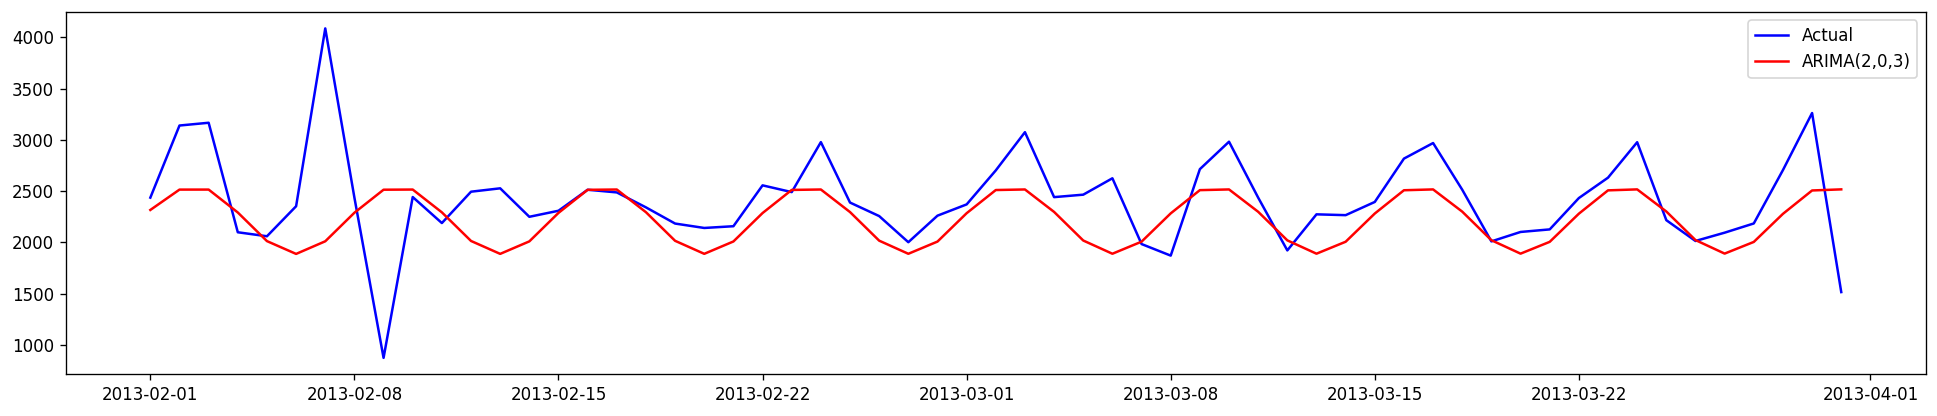

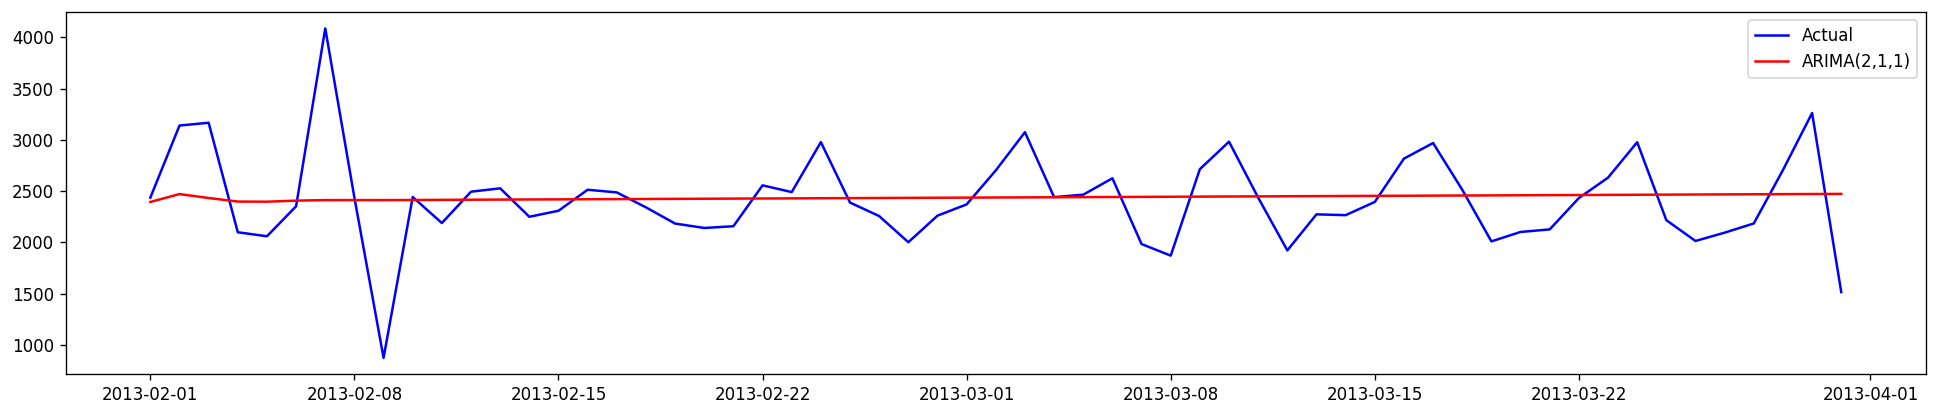

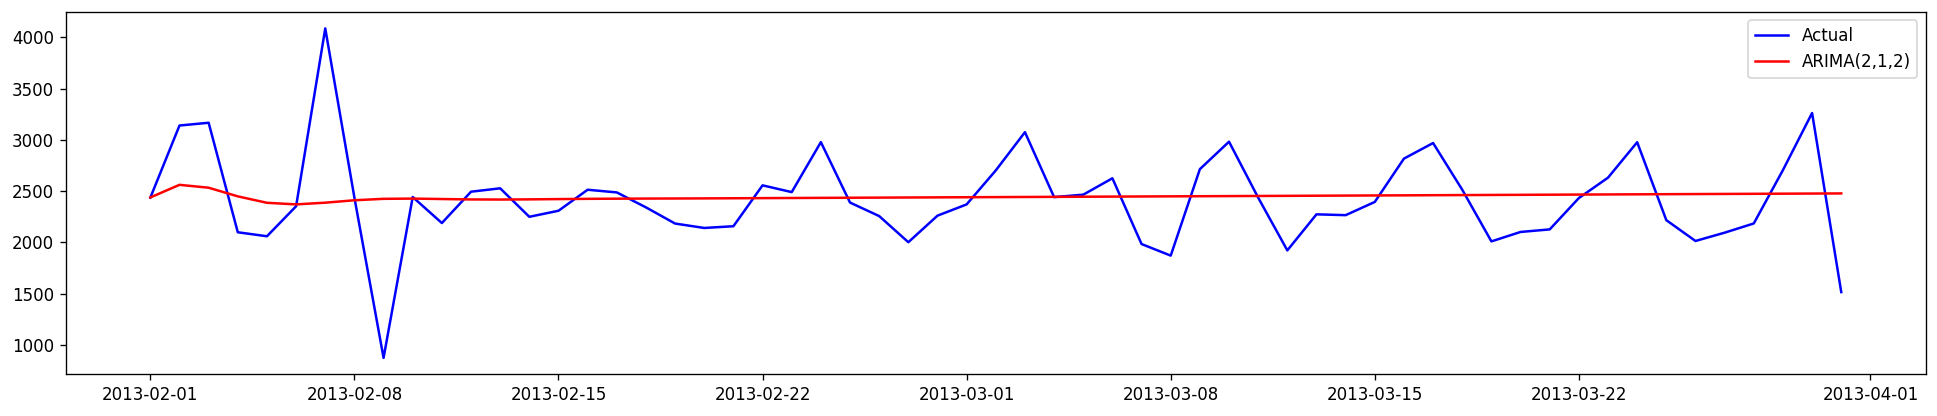

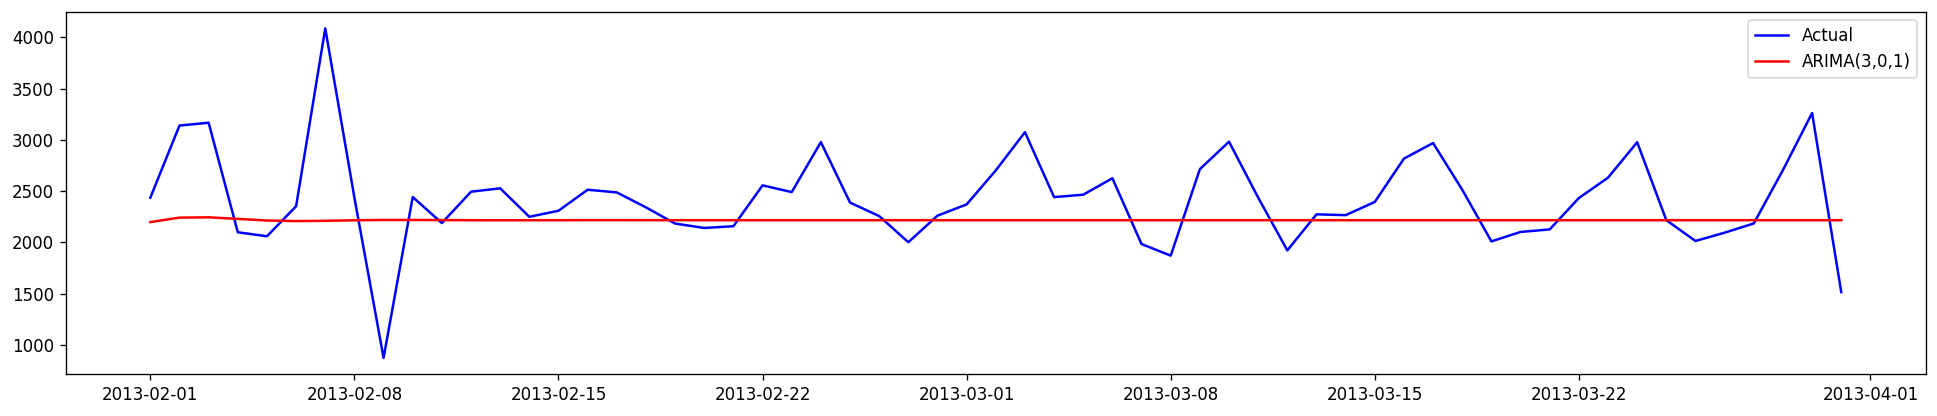

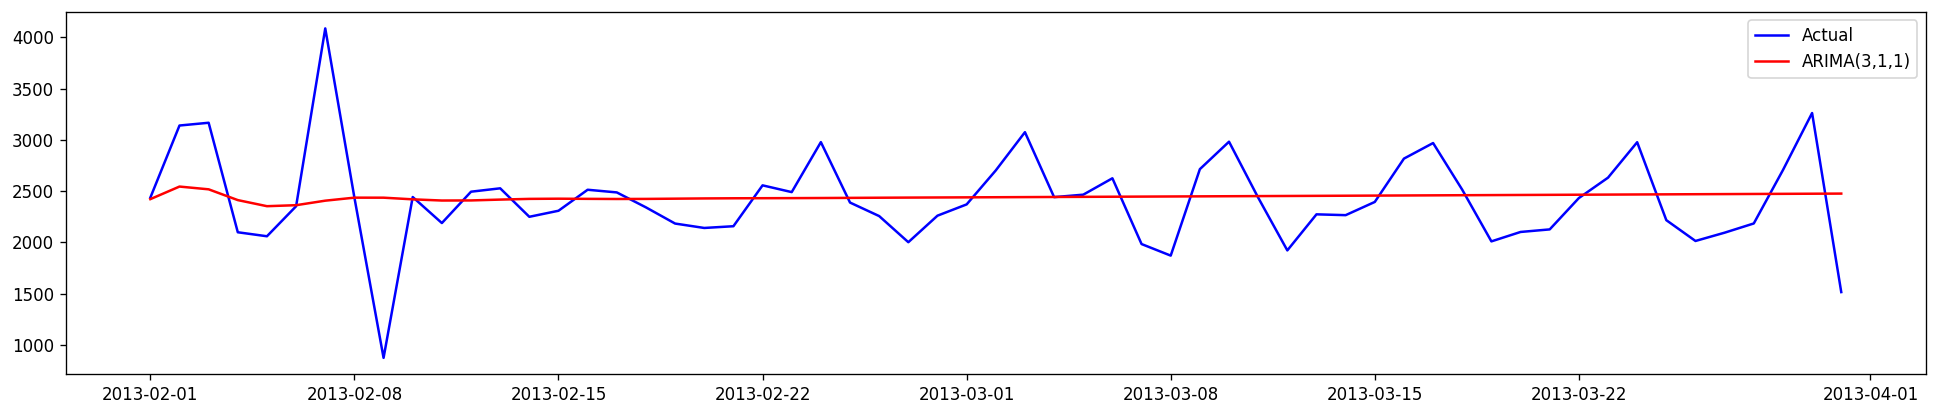

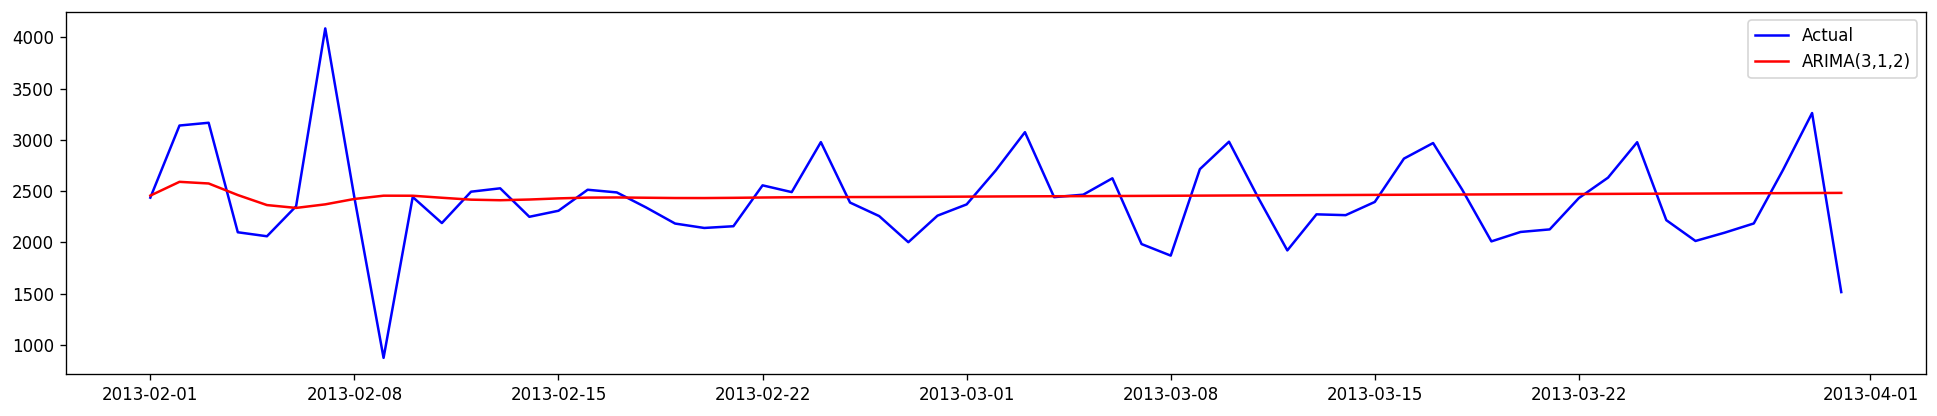

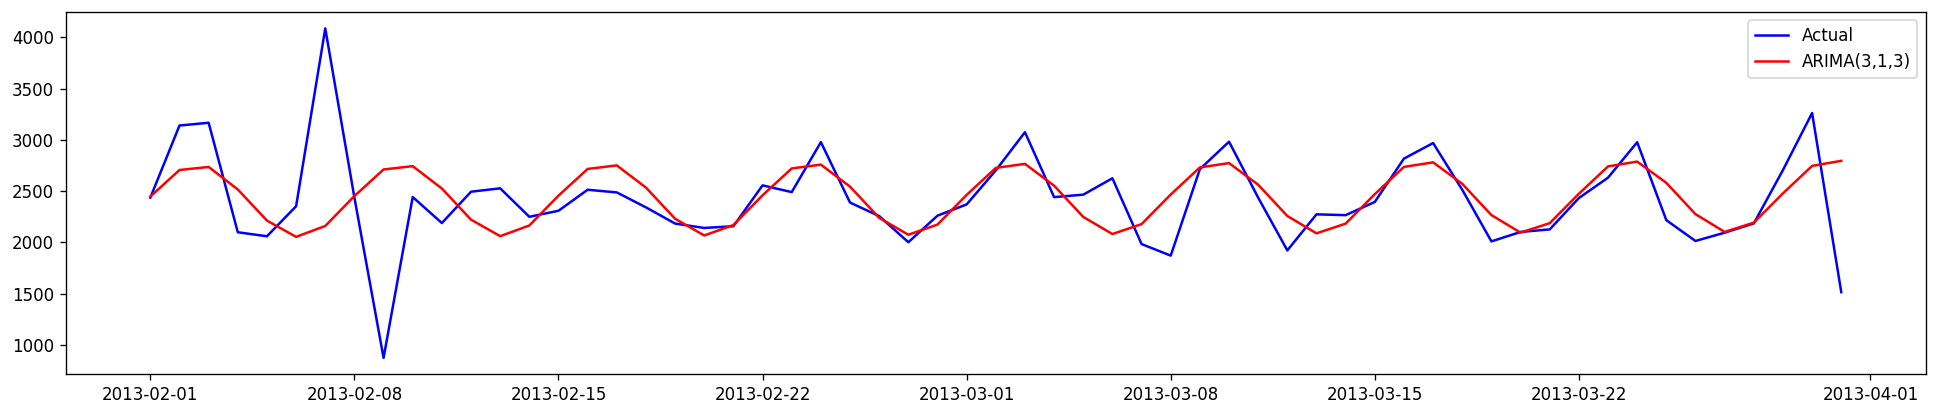

In [0]:
# Plot actual vs predicted
for k in gsa.model_dict.keys():
    plt.figure(figsize=(20,4))
    plt.plot(test['date'], test['id'], 'b', label="Actual")
    loc="upper right"
    plt.plot(test['date'], gsa.model_dict[k]['prediction'], 'r', label="ARIMA({})".format(k))
    plt.legend(loc="upper right")
    # plt.savefig('ARIMA({})_predict_vs_actual.png'.format(k))
    plt.show()
    


Residuals - ARIMA(1,0,1)

                 0
count   306.000000
mean     -0.227775
std     343.544374
min   -2397.130298
25%    -180.884779
50%     -46.538972
75%     162.564135
max    1070.832767

Residuals - ARIMA(1,0,2)

                 0
count   306.000000
mean     -0.202843
std     343.428767
min   -2281.714030
25%    -184.578886
50%     -48.363249
75%     158.807090
max    1120.716124

Residuals - ARIMA(1,0,3)

                 0
count   306.000000
mean     -0.320884
std     336.397742
min   -2188.127638
25%    -194.519764
50%     -54.333151
75%     150.351600
max    1101.171606

Residuals - ARIMA(2,0,1)

                 0
count   306.000000
mean     -0.262144
std     334.936077
min   -2148.504851
25%    -184.869879
50%     -52.711176
75%     148.010886
max    1118.542304

Residuals - ARIMA(2,0,2)

                 0
count   306.000000
mean     -0.909566
std     310.793182
min   -2080.280954
25%    -145.007297
50%     -45.967139
75%     111.477524
max    1516.574547

Residuals

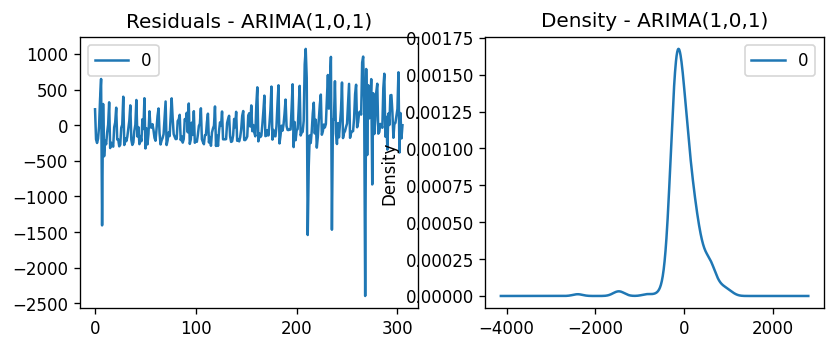

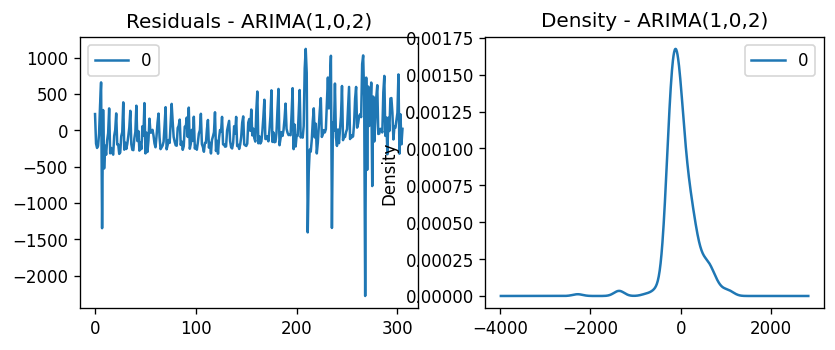

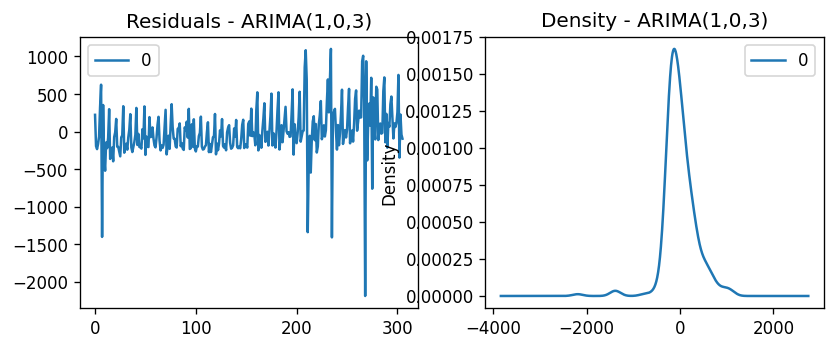

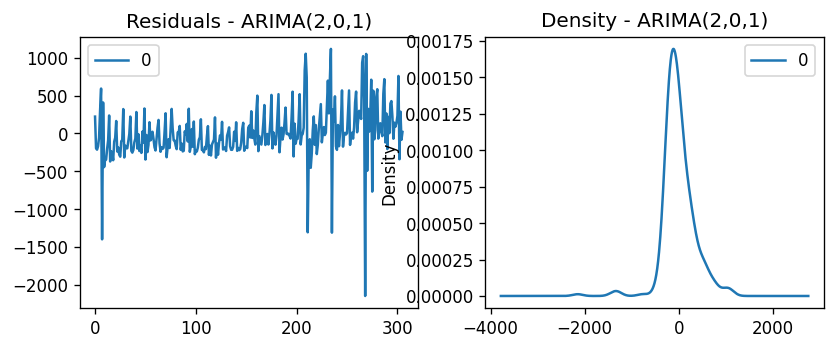

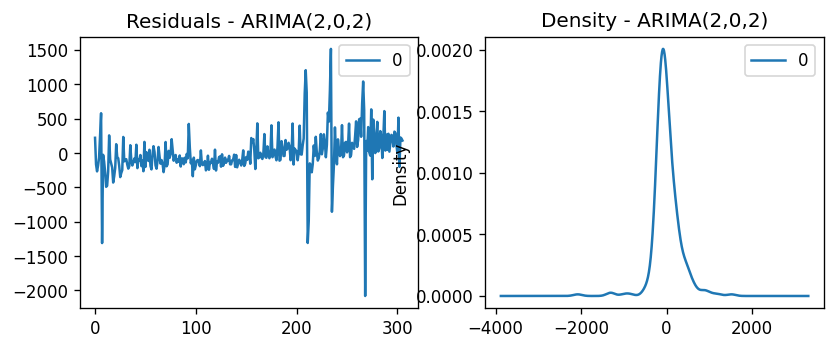

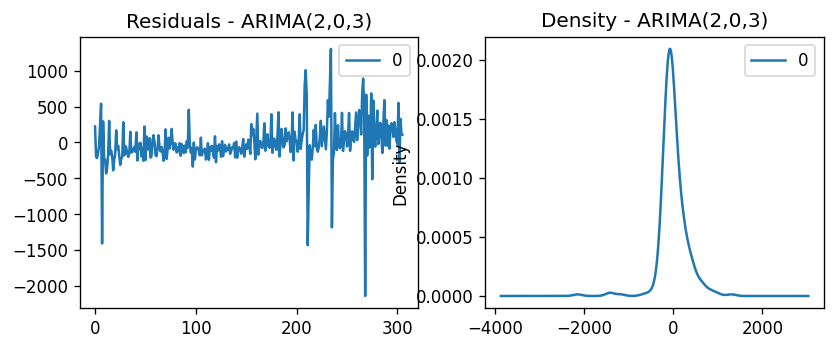

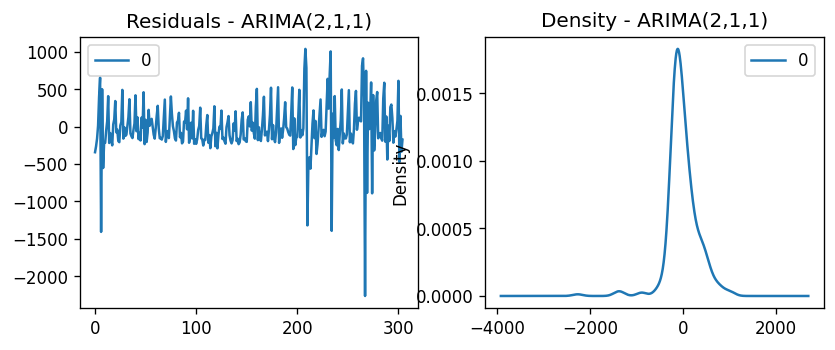

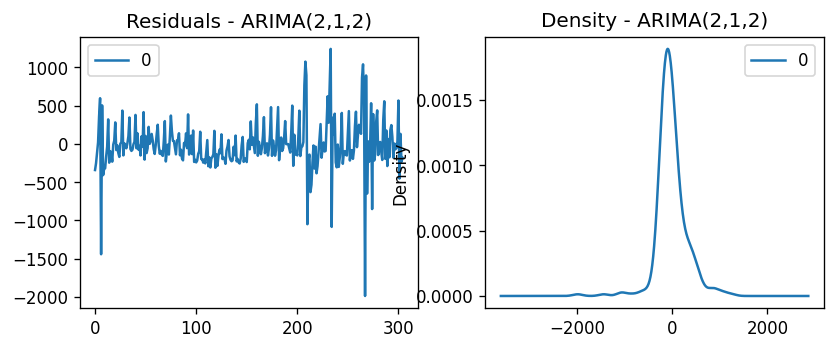

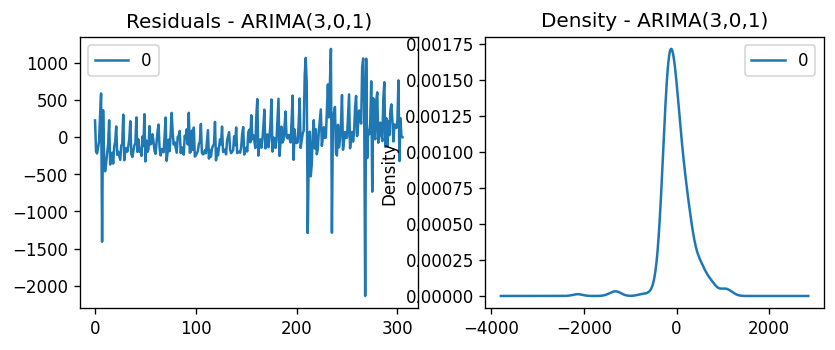

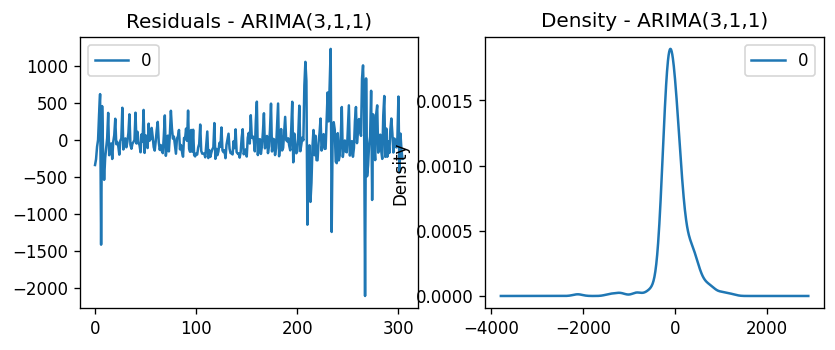

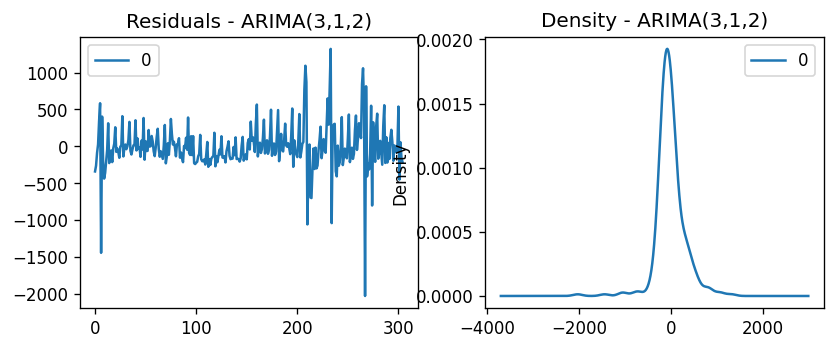

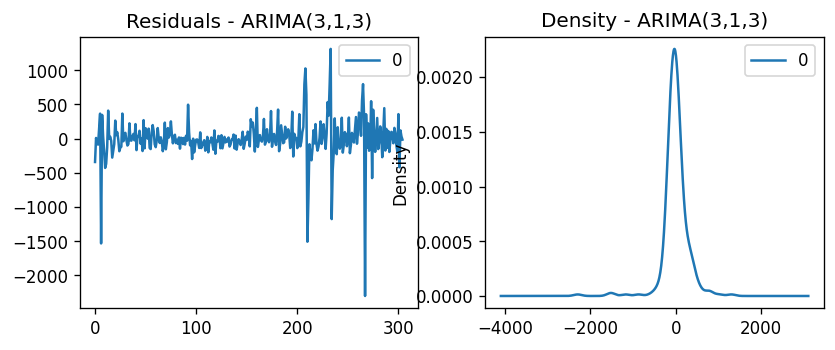

In [0]:
# Print residual errors of all arima model
for k in gsa.model_dict.keys():
    residuals = pd.DataFrame(gsa.model_dict[k]['res'])
    print("\nResiduals - ARIMA({})\n".format(k))
    print(residuals.describe())
    
# Plot residual errors of all arima model
for k in gsa.model_dict.keys():
    residuals = pd.DataFrame(gsa.model_dict[k]['res'])
    fig, ax = plt.subplots(1,2)
    residuals.plot(title="Residuals - ARIMA({})".format(k), ax=ax[0])
    residuals.plot(kind='kde', title="Density - ARIMA({})".format(k), ax=ax[1])
    plt.savefig('ARIMA({})_Residuals.png'.format(k))
    plt.show()

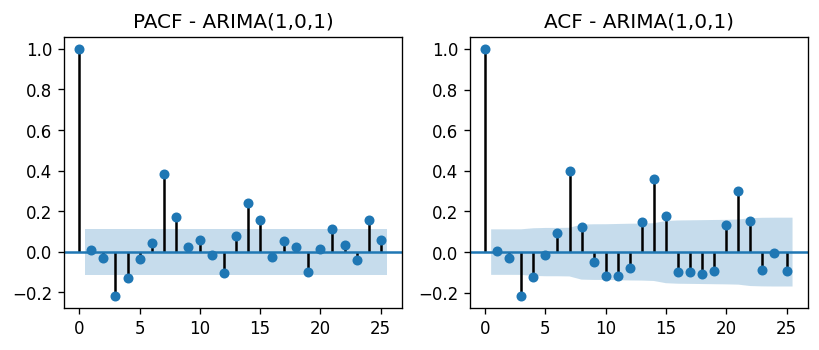

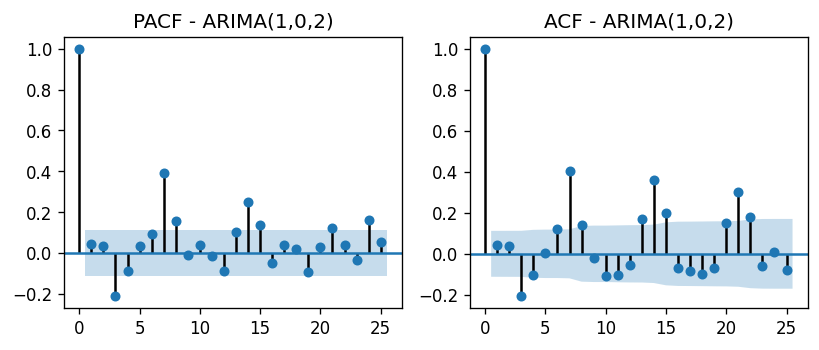

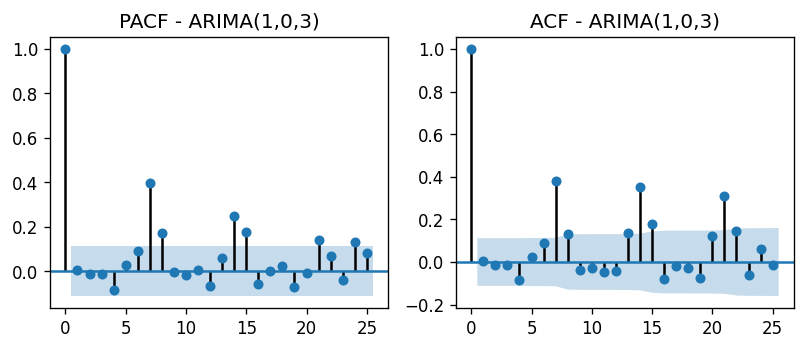

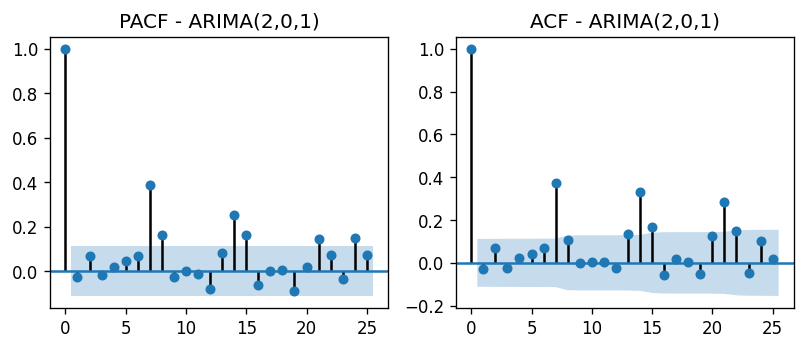

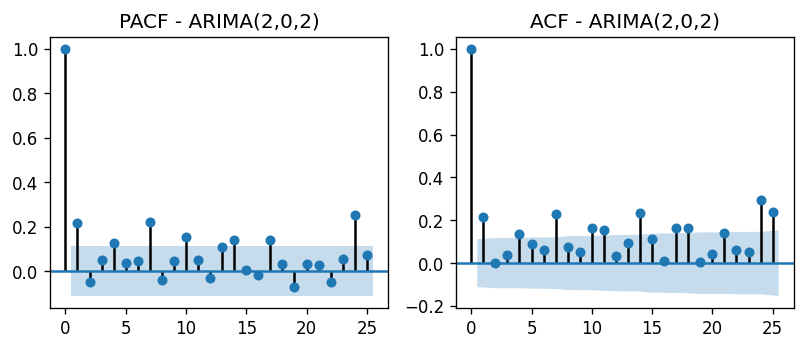

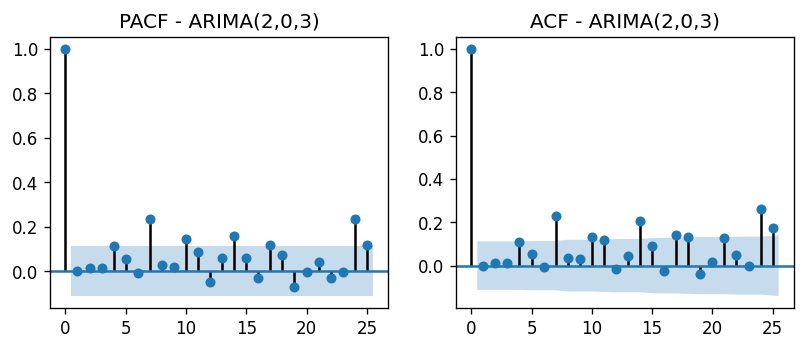

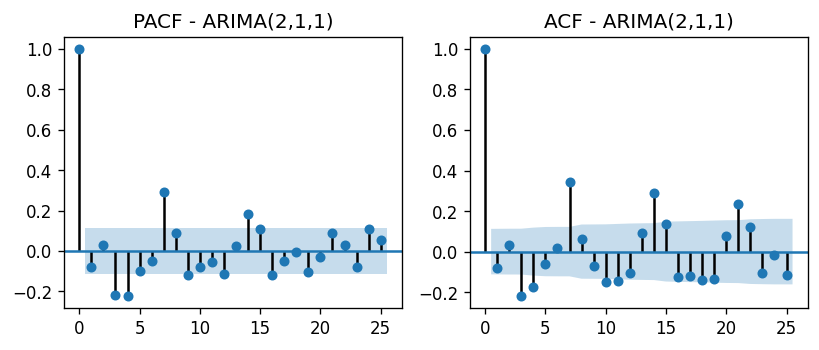

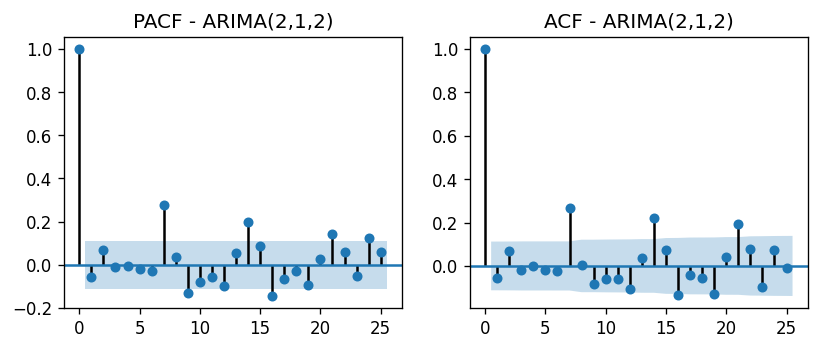

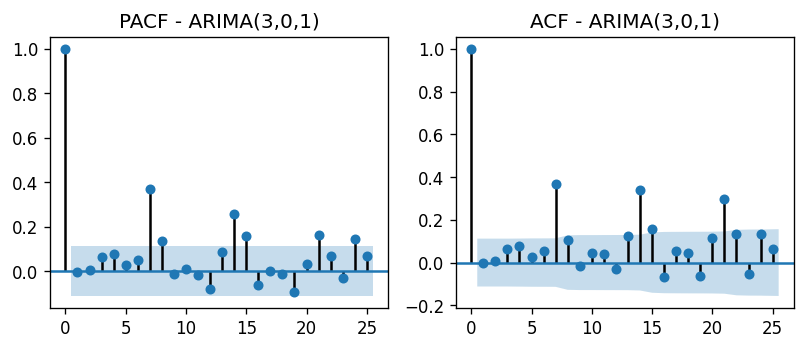

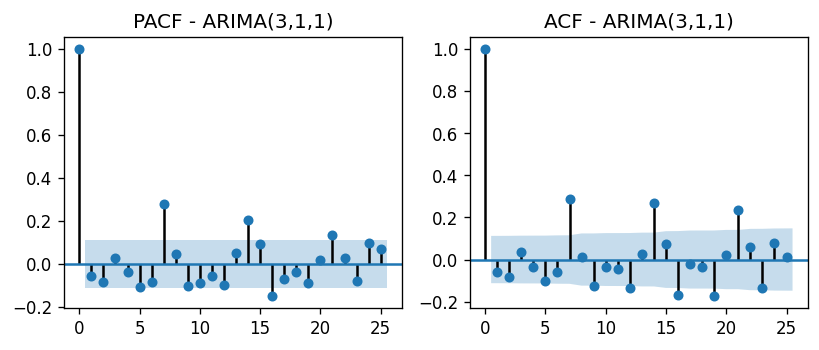

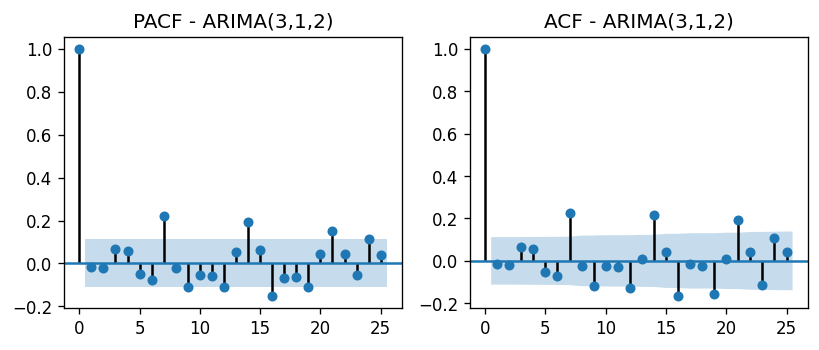

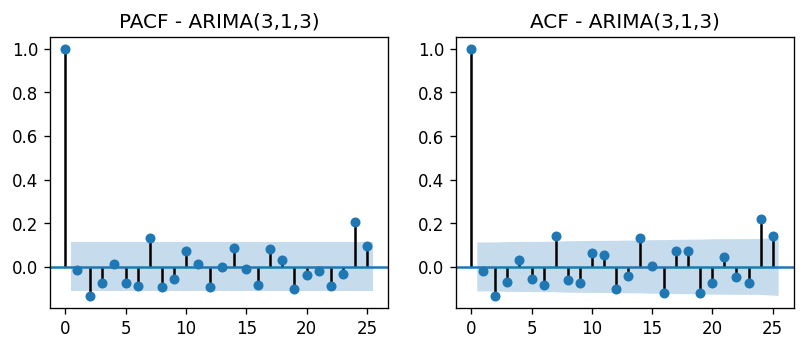

In [0]:
# creates ACF and PACF plots to check for any significant autocorrelation.
for k in gsa.model_dict.keys():
    residuals = pd.DataFrame(gsa.model_dict[k]['res'])
    fig, ax = plt.subplots(1,2)
    plot_pacf(residuals, ax=ax[0], title="PACF - ARIMA({})".format(k))
    plot_acf(residuals, ax=ax[1], title="ACF - ARIMA({})".format(k))
    plt.savefig('ARIMA({})_Residuals Autocorrelation.png'.format(k))
#     residuals.plot(title="Residuals - ARIMA({})".format(k), ax=ax[0])
#     residuals.plot(kind='kde', title="Density - ARIMA({})".format(k), ax=ax[1])
    plt.show()

In [0]:
# Make prediction for next 6 months
import datetime

forecast_date = pd.date_range(start=train['date'].tolist()[-1] + datetime.timedelta(days=1), periods=181)
model = ARIMA(train['id'].tolist(), order=(3, 1, 3))
model_fit = model.fit(disp=0)
forecast = model_fit.forecast(steps=181)[0]

# Export forecast data as csv
arima_forecast = pd.DataFrame(list(zip(forecast_date, forecast)), columns=['Date','Forecast'])
arima_forecast.to_csv("/content/drive/My Drive/ML_Project/arima_forecast.csv")

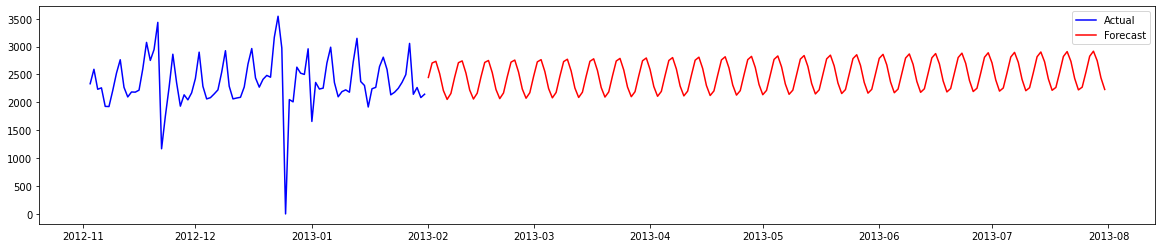

In [0]:
# Plot forecast
plt.figure(figsize=(20,4))
plt.plot(train['date'].tolist()[-90:], train['id'].tolist()[-90:], 'b', label="Actual")
loc="upper right"
plt.plot(forecast_date, forecast, 'r', label='Forecast')
plt.legend(loc="upper right")
plt.show()

# Forecasting Qty of Top Sale Item using Machine Learning

**Data Preparation for Supervised ML**

In [0]:
# Import the library
import datetime
from sklearn.ensemble import RandomForestRegressor

# lag_dataset_creator class
class lag_dataset_creator(object):
    def __init__(self,ori_list,lag_list,date_list):
        self.ori_list = ori_list
        self.lag_list = lag_list
        self.date_list = date_list
        self.list_dict = {}
    
    def create_df(self):
        self.list_dict['Date']=self.date_list
        
        for i in self.lag_list:
            lag = i
            list1 = []
            counter = 0
            while counter  < lag:
                list1.append(None)
                counter = counter + 1
            list1 = (list1 + self.ori_list)[:len(self.ori_list)]
            
            list_name = "Lag_{}".format(i)
            self.list_dict[list_name] = list1
            
        self.list_dict['Qty']=self.ori_list
        return pd.DataFrame.from_dict(self.list_dict).dropna(axis=0, how='any')
    

In [12]:
# Select highest sales item for ML analysis only
mlt = raw_train.copy()
mlt['item'] = mlt['category'].astype(str) + "_" + mlt['company'].astype(str) + "_" + mlt['brand'].astype(str)
mlt = mlt[(mlt['item'] == 'cat_9904_103338333_33170')]

# Prepare time series standard table
mlt['date'] = pd.to_datetime(mlt['date'])
mlt = mlt.groupby(['date'], as_index=False)['purchasequantity'].sum().sort_values(by='date', ascending=True)

# Find min date and max date
print("min date:{}, max date:{}".format(mlt['date'].min(), mlt['date'].max()))

# Create a datelist from 2012-04-01 to 2013-03-31
datelist = pd.date_range(start=start_date,end=end_date).to_frame(index=False,name='date')
mlt = pd.merge(datelist, mlt, on=['date'], how='left').fillna({'purchasequantity': 0})

# Instantiate a lag_dataset_creator object and run
lag_list = [1,2,3,4,5,6,7,14,21,28]
obj = lag_dataset_creator(mlt['purchasequantity'].tolist(),lag_list,mlt['date'].tolist())
df_ml = obj.create_df()
df_ml

min date:2012-04-01 00:00:00, max date:2013-03-31 00:00:00


,Date,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_14,Lag_21,Lag_28,Qty
28,2012-04-29,502.0,383.0,234.0,225.0,271.0,375.0,598.0,448.0,188.0,720.0,608.0
29,2012-04-30,608.0,502.0,383.0,234.0,225.0,271.0,375.0,281.0,319.0,445.0,381.0
30,2012-05-01,381.0,608.0,502.0,383.0,234.0,225.0,271.0,208.0,340.0,294.0,373.0
31,2012-05-02,373.0,381.0,608.0,502.0,383.0,234.0,225.0,174.0,227.0,343.0,283.0
32,2012-05-03,283.0,373.0,381.0,608.0,502.0,383.0,234.0,156.0,230.0,334.0,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2013-03-27,216.0,344.0,536.0,400.0,292.0,257.0,264.0,417.0,162.0,186.0,183.0
361,2013-03-28,183.0,216.0,344.0,536.0,400.0,292.0,257.0,363.0,112.0,222.0,258.0
362,2013-03-29,258.0,183.0,216.0,344.0,536.0,400.0,292.0,287.0,132.0,286.0,431.0
363,2013-03-30,431.0,258.0,183.0,216.0,344.0,536.0,400.0,351.0,340.0,251.0,490.0


In [0]:
# Split data into train and test set
ml_train = df_ml.loc[df_ml['Date'] < '2013-02-01']
ml_test = df_ml.loc[df_ml['Date'] >= '2013-02-01']

X_train = ml_train.iloc[:,1:-1]
y_train = ml_train.iloc[:,-1:]

X_test = ml_test.iloc[:,1:-1]
y_test = ml_test.iloc[:,-1:]

**Random Forest Regression**

In [0]:
# Instantiate RandomForestRegressor object
regr = RandomForestRegressor(n_estimators=20, random_state=0, criterion='mae')

# Fit regressor object with training set
regr.fit(X_train, y_train)

# Make prediction using regressor model
regr_prediction = regr.predict(X_test).tolist()

In [0]:
# Check model performance
print("MAE: {:.2f}".format(mean_absolute_error(y_test['Qty'].tolist(), regr_prediction)))

MAE: 72.10


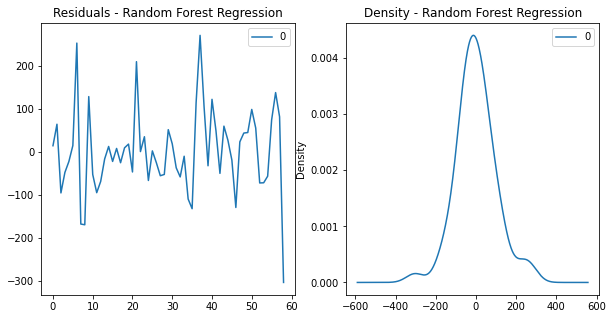

In [0]:
# Plot residual errors of model
rf_res = map(sub, y_test['Qty'].tolist(), regr_prediction)
residuals = pd.DataFrame(rf_res)
fig, ax = plt.subplots(1,2,figsize=(10, 5))
residuals.plot(title="Residuals - Random Forest Regression", ax=ax[0])
residuals.plot(kind='kde', title="Density - Random Forest Regression", ax=ax[1])
plt.savefig('RF_Residuals.png')
plt.show()

In [0]:
# print residual statistic
print("Random Forest\n")
print(residuals.describe())

Random Forest

                0
count   59.000000
mean     0.631356
std     98.272280
min   -303.100000
25%    -53.975000
50%      0.650000
75%     50.200000
max    270.450000


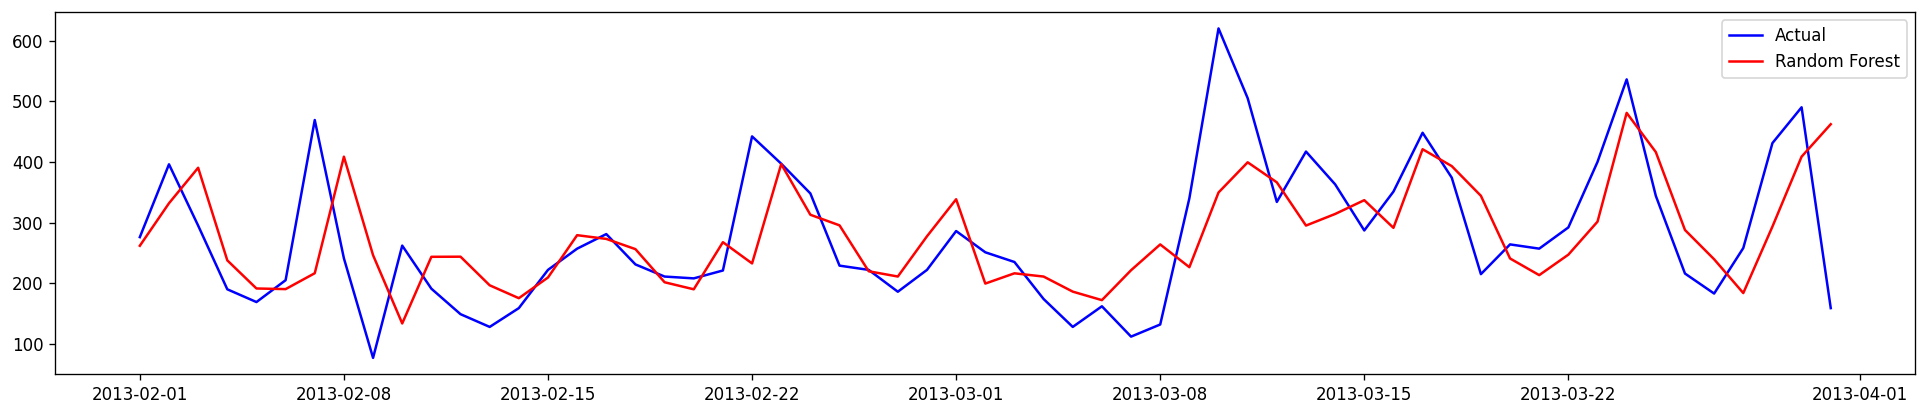

In [0]:
# Plot actual vs predicted
plt.figure(figsize=(20,4))
plt.plot(ml_test['Date'], ml_test['Qty'], 'b', label="Actual")
loc="upper right"
plt.plot(ml_test['Date'], regr_prediction, 'r', label="Random Forest") 
plt.legend(loc="upper right")
plt.savefig('RF_predict_vs_actual.png')
plt.show()

In [17]:
# Make prediction for next month
lag_list = [1,2,3,4,5,6,7,14,21,28]
qty_list = mlt['purchasequantity'].tolist()
date_list = mlt['date'].tolist()


# Fit and predict
c = 0
for i in range(30):
  new_date = date_list[-1] + datetime.timedelta(days=1)
  date_list.append(new_date)
  qty_list.append(0)

  obj2 = lag_dataset_creator(qty_list,lag_list,date_list)
  prediction_df = obj2.create_df()
  qty_list[-1] = round(regr.predict(prediction_df.iloc[-1:,1:-1])[0])

  obj2 = lag_dataset_creator(qty_list,lag_list,date_list)
  prediction_df = obj2.create_df()
  c = c + 1

prediction_df

,Date,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_14,Lag_21,Lag_28,Qty
28,2012-04-29,502.0,383.0,234.0,225.0,271.0,375.0,598.0,448.0,188.0,720.0,608.0
29,2012-04-30,608.0,502.0,383.0,234.0,225.0,271.0,375.0,281.0,319.0,445.0,381.0
30,2012-05-01,381.0,608.0,502.0,383.0,234.0,225.0,271.0,208.0,340.0,294.0,373.0
31,2012-05-02,373.0,381.0,608.0,502.0,383.0,234.0,225.0,174.0,227.0,343.0,283.0
32,2012-05-03,283.0,373.0,381.0,608.0,502.0,383.0,234.0,156.0,230.0,334.0,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,2013-04-26,228.0,246.0,219.0,217.0,238.0,264.0,255.0,263.0,318.0,431.0,268.0
391,2013-04-27,268.0,228.0,246.0,219.0,217.0,238.0,264.0,293.0,359.0,490.0,295.0
392,2013-04-28,295.0,268.0,228.0,246.0,219.0,217.0,238.0,297.0,375.0,159.0,278.0
393,2013-04-29,278.0,295.0,268.0,228.0,246.0,219.0,217.0,288.0,359.0,198.0,267.0


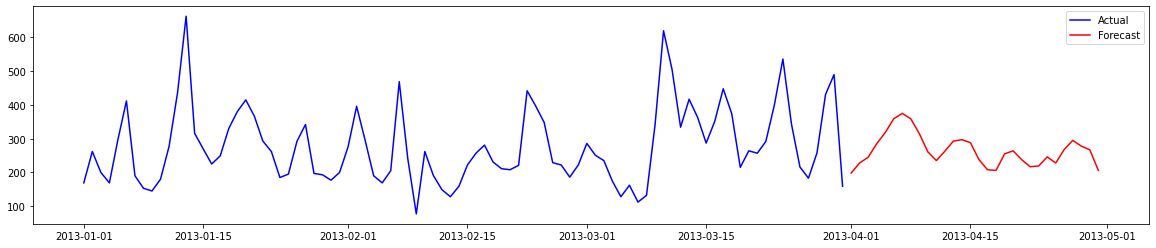

In [18]:
# Plot forecast
actual = prediction_df.loc[prediction_df['Date'] <= '2013-03-31']
forecast = prediction_df.loc[prediction_df['Date'] > '2013-03-31']


plt.figure(figsize=(20,4))
plt.plot(actual['Date'].tolist()[-90:], actual['Qty'].tolist()[-90:], 'b', label="Actual")
loc="upper right"
plt.plot(forecast['Date'].tolist(), forecast['Qty'].tolist(), 'r', label='Forecast')
plt.legend(loc="upper right")
plt.show()

# Export forecast data as csv
ml_forecast = pd.DataFrame(list(zip(forecast['Date'].tolist(), forecast['Qty'].tolist())), columns=['Date','Forecast'])
ml_forecast.to_csv("/content/drive/My Drive/ML_Project/ml_forecast.csv")